# Fall 2024 Final Project (OPIM 5512 and 5509)
**Dr. Dave Wanik - Dept. of Operations and Information Management - University of Connecticut**

Can you predict the level of problematic internet usage exhibited by children and adolescents, based on their physical activity? The goal of this competition is to develop a predictive model that analyzes children's physical activity and fitness data to identify early signs of problematic internet use. Identifying these patterns can help trigger interventions to encourage healthier digital habits.

For our final project (5512 and 5509), we are going to use a simplified version of this Kaggle competition. On your own, you are welcome to submit to the final competition (and I hope you try!)

* https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data

* Group Number: 15
* Names of Groups Members: Sri Vinay Nimmagadla, Rakesh Moparthi, Mashooq Rabani Shaik

By submitting this project, I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.

- Fllowing will be the flow of the current notebook.
  - Data from MinFC Dataset will be checked for potentially useful features.
  - Data from Some_FC Dataset will be checked for potentially useful features.
  - Data from Demographics data will be checked for potentially useful features.
  - One Final model for prediction will be presented in Section 5.
  - Business insights will be shown after section 6.

# Step 1: Getting data from MinFC results.

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading training and testing ids to keep the training and datasets consistents with Professor's datasets.
train_id=pd.read_csv('/content/drive/MyDrive/F24_DS_DL_finalProject_data_withID(1)/y_train_F24_withID.csv')
test_id=pd.read_csv('/content/drive/MyDrive/F24_DS_DL_finalProject_data_withID(1)/y_test_F24_withID.csv')

In [ ]:
train_id.head()

Unnamed: 0  sii        id
0        626  1.0  a0522c83
1        307  1.0  4a4a0f78
2        662  1.0  a8b0428d
3        394  0.0  6282e693
4        644  0.0  a4530b41

In [ ]:
print(train_id.shape)
print(test_id.shape)

(797, 3)
(201, 3)


In [ ]:
#Creating a training dataset from training ids from MinFC results.
import os
# Convert IDs to a list
tr_ids = train_id['id'].to_list()
te_ids = test_id['id'].to_list()

# Define the base file path
file_path = '/content/drive/MyDrive/MinFC_results-20241120T125015Z-001/MinFC_results'

all_data = []
for i in tr_ids:
    try:
       path = os.path.join(file_path, f"id={i}.csv")
       data = pd.read_csv(path)
       data['id'] = i
       all_data.append(data)
    except Exception as e:
        # Print the error and continue with the next file
        print(f"Error processing ID {i}: {e}")

# Combine all the DataFrames into a single DataFrame
final_train_data = pd.concat(all_data, ignore_index=True)

# Display the final DataFrame
final_train_data=pd.merge(final_train_data,train_id[['id','sii']],on='id',how='left')
final_train_data.head()


Error processing ID nan: [Errno 2] No such file or directory: '/content/drive/MyDrive/MinFC_results-20241120T125015Z-001/MinFC_results/id=nan.csv'


X__absolute_maximum  X__length  X__maximum   X__mean  X__median  \
0             2.106928   400632.0    1.173187 -0.505789  -0.716905   
1             7.935687   380312.0    7.935687  0.121610   0.182309   
2             1.024297     1386.0    1.024297 -0.275158  -0.458828   
3             1.700533   137029.0    1.463910 -0.256388  -0.394569   
4             8.022779   407268.0    8.022779  0.016842   0.026158   

   X__minimum  X__root_mean_square  X__standard_deviation  X__sum_values  \
0   -2.106928             0.752703               0.557440 -202635.298517   
1   -7.919588             0.592448               0.579833   46249.668797   
2   -0.996849             0.474399               0.386449    -381.369253   
3   -1.700533             0.599787               0.542227  -35132.595479   
4   -1.224444             0.555549               0.555293    6859.332840   

   X__variance  ...  weekday__maximum  weekday__mean  weekday__median  \
0     0.310739  ...               7.0       4.012999              4.0   
1     0.336206  ...               7.0       3.897484              4.0   
2     0.149343  ...               7.0       5.284993              5.0   
3     0.294010  ...               7.0       3.682242              4.0   
4     0.308351  ...               7.0       4.200448              4.0   

   weekday__minimum  weekday__root_mean_square  weekday__standard_deviation  \
0               1.0                   4.447266                     1.916770   
1               1.0                   4.385669                     2.010898   
2               1.0                   5.341512                     0.774982   
3               1.0                   4.055526                     1.699524   
4               1.0                   4.670652                     2.042359   

   weekday__sum_values  weekday__variance        id  sii  
0            1607736.0           3.674006  a0522c83  1.0  
1            1482260.0           4.043709  4a4a0f78  1.0  
2               7325.0           0.600597  a8b0428d  1.0  
3             504574.0           2.888383  6282e693  0.0  
4            1710708.0           4.171229  a4530b41  0.0  

[5 rows x 142 columns]

In [ ]:
original_cols_MinFC=final_train_data.columns
original_cols_MinFC

Index(['X__absolute_maximum', 'X__length', 'X__maximum', 'X__mean',
       'X__median', 'X__minimum', 'X__root_mean_square',
       'X__standard_deviation', 'X__sum_values', 'X__variance',
       ...
       'weekday__maximum', 'weekday__mean', 'weekday__median',
       'weekday__minimum', 'weekday__root_mean_square',
       'weekday__standard_deviation', 'weekday__sum_values',
       'weekday__variance', 'id', 'sii'],
      dtype='object', length=142)

- We think that time_of_day, quarter, weekday, and relative_date_PCIAT are not good features to predict problematic internet usage based on the therin meaning as per the data dictionary.
- time_of_day - Time of day representing the start of a 5s window that the data has been sampled over, with format %H:%M:%S.%9f.
- weekday - The day of the week, coded as an integer with 1 being Monday and 7 being Sunday.
- quarter - The quarter of the year, an integer from 1 to 4.
- relative_date_PCIAT - The number of days (integer) since the PCIAT test was administered (negative days indicate that the actigraphy data has been collected before the test was administered).

In [ ]:
# Dropping time_of_day, weekday, quarter, and relative_dat_PCIAT from trainign data
final_train_data = final_train_data.drop(final_train_data.iloc[:, 90:140].columns, axis=1)

In [ ]:
final_train_data.head()

X__absolute_maximum  X__length  X__maximum   X__mean  X__median  \
0             2.106928   400632.0    1.173187 -0.505789  -0.716905   
1             7.935687   380312.0    7.935687  0.121610   0.182309   
2             1.024297     1386.0    1.024297 -0.275158  -0.458828   
3             1.700533   137029.0    1.463910 -0.256388  -0.394569   
4             8.022779   407268.0    8.022779  0.016842   0.026158   

   X__minimum  X__root_mean_square  X__standard_deviation  X__sum_values  \
0   -2.106928             0.752703               0.557440 -202635.298517   
1   -7.919588             0.592448               0.579833   46249.668797   
2   -0.996849             0.474399               0.386449    -381.369253   
3   -1.700533             0.599787               0.542227  -35132.595479   
4   -1.224444             0.555549               0.555293    6859.332840   

   X__variance  ...  non-wear_flag__maximum  non-wear_flag__mean  \
0     0.310739  ...                     1.0              0.03190   
1     0.336206  ...                     0.0              0.00000   
2     0.149343  ...                     0.0              0.00000   
3     0.294010  ...                     0.0              0.00000   
4     0.308351  ...                     1.0              0.04807   

   non-wear_flag__median  non-wear_flag__minimum  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   non-wear_flag__root_mean_square  non-wear_flag__standard_deviation  \
0                         0.176920                           0.174020   
1                         0.000000                           0.000000   
2                         0.000000                           0.000000   
3                         0.000000                           0.000000   
4                         0.215351                           0.209918   

   non-wear_flag__sum_values  non-wear_flag__variance        id  sii  
0               12780.000001                 0.030283  a0522c83  1.0  
1                   0.000000                 0.000000  4a4a0f78  1.0  
2                   0.000000                 0.000000  a8b0428d  1.0  
3                   0.000000                 0.000000  6282e693  0.0  
4               19577.500003                 0.044065  a4530b41  0.0  

[5 rows x 92 columns]

In [ ]:
final_train_data.shape

(796, 92)

In [ ]:
final_train_data.isna().sum().sum()

0

In [ ]:
#Creating a test dataset from test ids from MinFC results.
# Define the base file path
file_path = '/content/drive/MyDrive/MinFC_results-20241120T125015Z-001/MinFC_results'

all_data = []
for i in te_ids:
    try:
       path = os.path.join(file_path, f"id={i}.csv")
       data = pd.read_csv(path)
       data['id'] = i
       all_data.append(data)
    except Exception as e:
        # Print the error and continue with the next file
        print(f"Error processing ID {i}: {e}")

# Combine all the DataFrames into a single DataFrame
final_test_data = pd.concat(all_data, ignore_index=True)

# Display the final DataFrame
final_test_data=pd.merge(final_test_data,test_id[['id','sii']],on='id',how='left')
final_test_data.head()


Error processing ID nan: [Errno 2] No such file or directory: '/content/drive/MyDrive/MinFC_results-20241120T125015Z-001/MinFC_results/id=nan.csv'


X__absolute_maximum  X__length  X__maximum   X__mean  X__median  \
0             1.208483   330252.0    1.208483  0.143036   0.015998   
1             1.035127   402912.0    1.026294  0.006469   0.010479   
2             1.470279   206585.0    1.470279  0.067980   0.162901   
3             1.920816   414420.0    1.840322 -0.018163  -0.002206   
4             2.169161   409296.0    1.741047 -0.013084   0.009984   

   X__minimum  X__root_mean_square  X__standard_deviation  X__sum_values  \
0   -1.083477             0.424535               0.399713   47237.900017   
1   -1.035127             0.269633               0.269555    2606.288714   
2   -1.366556             0.622645               0.618923   14043.664412   
3   -1.920816             0.504786               0.504459   -7527.113169   
4   -2.169161             0.417657               0.417452   -5355.370049   

   X__variance  ...  weekday__maximum  weekday__mean  weekday__median  \
0     0.159771  ...               7.0       3.997929              4.0   
1     0.072660  ...               7.0       4.117763              4.0   
2     0.383065  ...               7.0       3.828579              4.0   
3     0.254479  ...               7.0       4.146489              4.0   
4     0.174266  ...               7.0       4.147766              4.0   

   weekday__minimum  weekday__root_mean_square  weekday__standard_deviation  \
0               1.0                   4.509118                     2.085356   
1               1.0                   4.553824                     1.944568   
2               1.0                   4.296379                     1.949579   
3               1.0                   4.632862                     2.066408   
4               1.0                   4.582896                     1.949095   

   weekday__sum_values  weekday__variance        id  sii  
0            1320324.0           4.348711  d8037389  1.0  
1            1659096.0           3.781343  fa34f945  1.0  
2             790927.0           3.800859  15f2e240  0.0  
3            1718388.0           4.270042  98ed2153  1.0  
4            1697664.0           3.798970  7187caec  1.0  

[5 rows x 142 columns]

In [ ]:
final_test_data.shape

(200, 142)

In [ ]:
# Dropping time_of_day, weekday, quarter, and relative_dat_PCIAT from testing data
final_test_data = final_test_data.drop(final_test_data.iloc[:, 90:140].columns, axis=1)

In [ ]:
final_test_data.isna().sum().sum()

0

- At the end of step 1
  - We see that train data has 726 rows and test data had 200 rows as intended.
  - There are no null values.

##  Step 1.2. Intial feature selection

- Doing EDA with 140 features is very challenging.
- Hence, important features will be picked using Mutual information method.

###     Table 1: Imporatant featuures based on Mutual information method.

In [ ]:
# Using Mutual information method to pick potentially useful
from sklearn.feature_selection import mutual_info_classif
X=final_train_data.drop(['id','sii'],axis=1)
y=final_train_data['sii']
mic=mutual_info_classif(X,y,random_state=99)

mi_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mic
}).sort_values(by='mutual_info', ascending=False)

# Coulumns which have mutual_info more than or equal to 0.01 are selected
mi_df[(mi_df['mutual_info']>=0.01)]

feature  mutual_info
56             enmo__root_mean_square     0.044938
13                            Y__mean     0.039699
84              non-wear_flag__median     0.033698
44            battery_voltage__median     0.032178
16                Y__root_mean_square     0.028695
83                non-wear_flag__mean     0.027478
85             non-wear_flag__minimum     0.027331
59                     enmo__variance     0.024777
57           enmo__standard_deviation     0.024359
65                     index__minimum     0.021763
48        battery_voltage__sum_values     0.020548
7               X__standard_deviation     0.018977
9                         X__variance     0.018228
25                         Z__minimum     0.017562
34                     anglez__median     0.016063
77          light__standard_deviation     0.014673
80    non-wear_flag__absolute_maximum     0.014588
53                         enmo__mean     0.014268
58                   enmo__sum_values     0.013307
6                 X__root_mean_square     0.013051
17              Y__standard_deviation     0.012667
19                        Y__variance     0.012649
18                      Y__sum_values     0.012558
29                        Z__variance     0.012069
73                        light__mean     0.011938
40  battery_voltage__absolute_maximum     0.011711
27              Z__standard_deviation     0.011658
22                         Z__maximum     0.011530
79                    light__variance     0.011447
87  non-wear_flag__standard_deviation     0.010349

In [ ]:
len(mi_df[(mi_df['mutual_info']>=0.01)])

30

In [ ]:
important_features = mi_df[mi_df['mutual_info'] >= 0.01]['feature'].to_list()


In [ ]:
final_feature_train_data=final_train_data[important_features+['sii','id']]
final_feature_test_data=final_test_data[important_features+['sii','id']]

In [ ]:
final_feature_train_data.head()

enmo__root_mean_square   Y__mean  non-wear_flag__median  \
0                0.081017 -0.069706                    0.0   
1                0.111455  0.032871                    0.0   
2                0.052506  0.259596                    0.0   
3                0.185004 -0.066792                    0.0   
4                0.128188 -0.047838                    0.0   

   battery_voltage__median  Y__root_mean_square  non-wear_flag__mean  \
0                   3818.0             0.383897              0.03190   
1                   3794.0             0.448347              0.00000   
2                   3689.0             0.525897              0.00000   
3                   4000.0             0.536016              0.00000   
4                   3806.0             0.516438              0.04807   

   non-wear_flag__minimum  enmo__variance  enmo__standard_deviation  \
0                     0.0        0.005913                  0.076896   
1                     0.0        0.011247                  0.106053   
2                     0.0        0.001862                  0.043151   
3                     0.0        0.026763                  0.163593   
4                     0.0        0.014222                  0.119255   

   index__minimum  ...  Y__sum_values  Z__variance  light__mean  \
0             0.0  ...  -27926.553970     0.254734    21.629860   
1             0.0  ...   12501.089329     0.389918    22.919933   
2             0.0  ...     359.800697     0.382221    25.377676   
3             0.0  ...   -9152.439808     0.183785    87.192595   
4             0.0  ...  -19482.832724     0.338200    17.082885   

   battery_voltage__absolute_maximum  Z__standard_deviation  Z__maximum  \
0                             4187.0               0.504712    3.051998   
1                             4120.0               0.624434    2.057938   
2                             4181.0               0.618240    1.015755   
3                             4181.0               0.428701    1.619048   
4                             4175.0               0.581550    2.035529   

   light__variance  non-wear_flag__standard_deviation  sii        id  
0      7852.662446                           0.174020  1.0  a0522c83  
1     12595.407035                           0.000000  1.0  4a4a0f78  
2       224.000235                           0.000000  1.0  a8b0428d  
3     92285.765499                           0.000000  0.0  6282e693  
4      4085.330526                           0.209918  0.0  a4530b41  

[5 rows x 32 columns]

###   Figure 1: Correlation between important_features and target

- We see from the correlation plot that certain features like light variance and light standard deviation are highly correlated. And standard_deviation= Sqrt(variance) so such columns will be dropped. So feature__variance columns will be dropped.
- Similarly mean and sum of values are highly correlated. Hence, feature__sum values will be dropped.
- Features like index__minimum and non-wear_flag__minimum probably have no variance in data. So, they will be dropped.

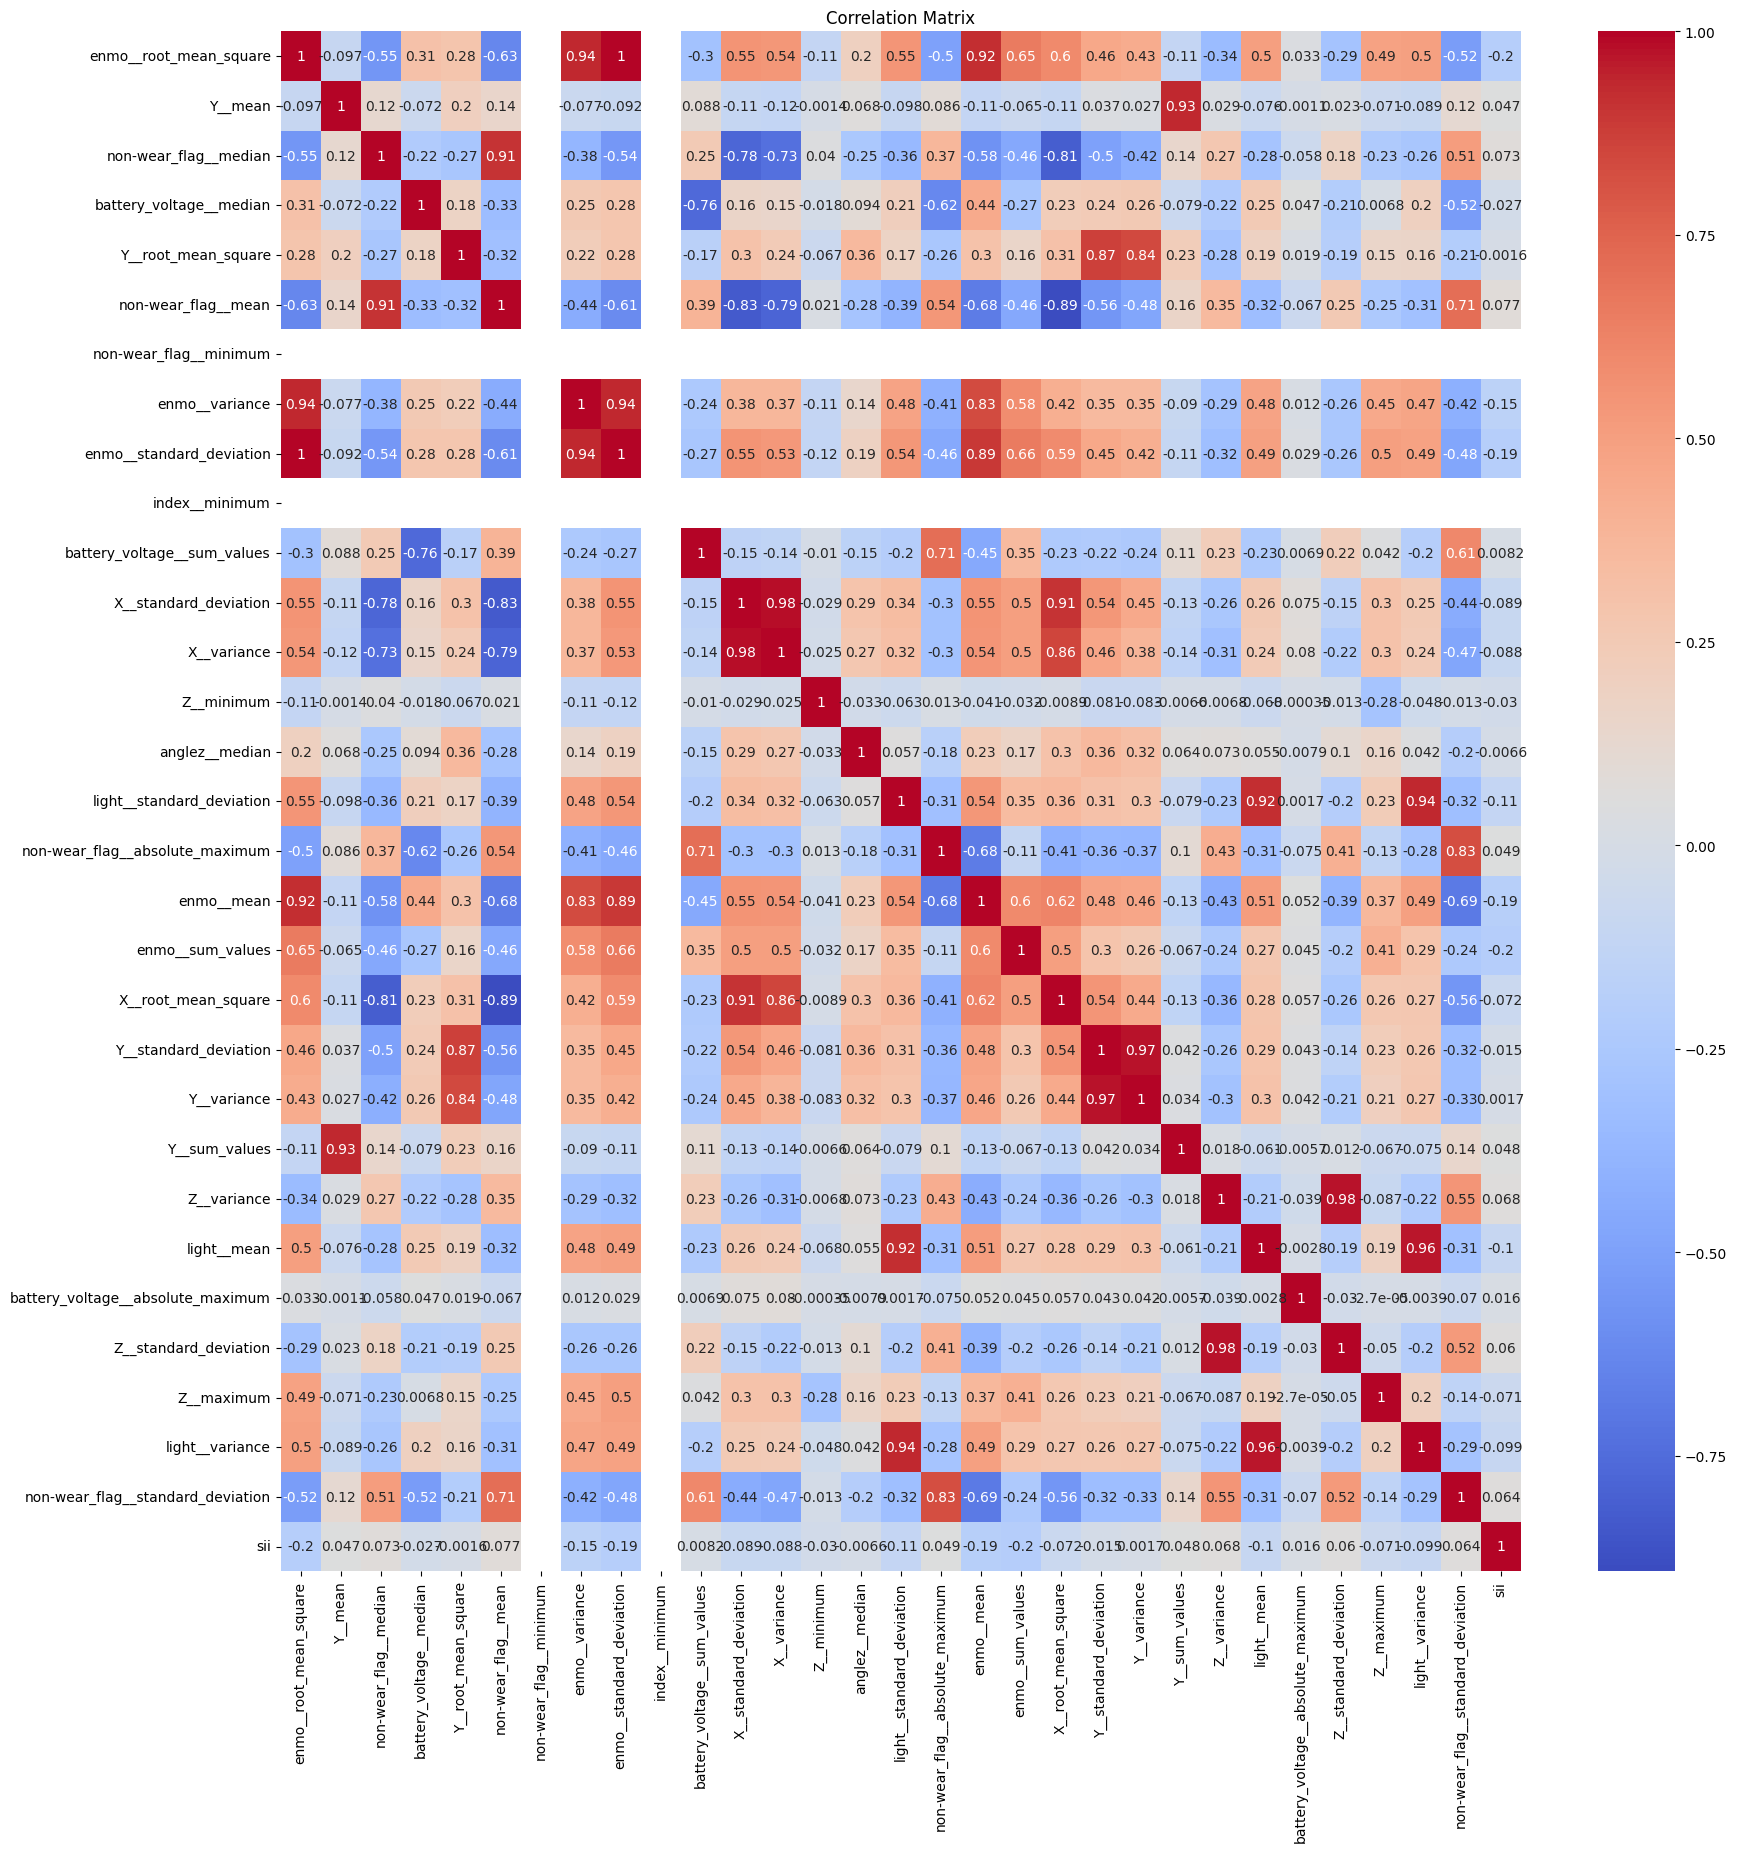

In [ ]:
cor1=(final_feature_train_data.drop(columns=['id'])).corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(cor1,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
final_feature_train_data=final_feature_train_data.drop(columns=['non-wear_flag__minimum','enmo__variance','index__minimum','battery_voltage__sum_values',
                                                                'X__variance','enmo__sum_values','Y__variance','Y__sum_values','Z__variance','light__variance'])

In [ ]:
final_feature_test_data=final_feature_test_data.drop(columns=['non-wear_flag__minimum','enmo__variance','index__minimum','battery_voltage__sum_values',
                                                                'X__variance','enmo__sum_values','Y__variance','Y__sum_values','Z__variance','light__variance'])

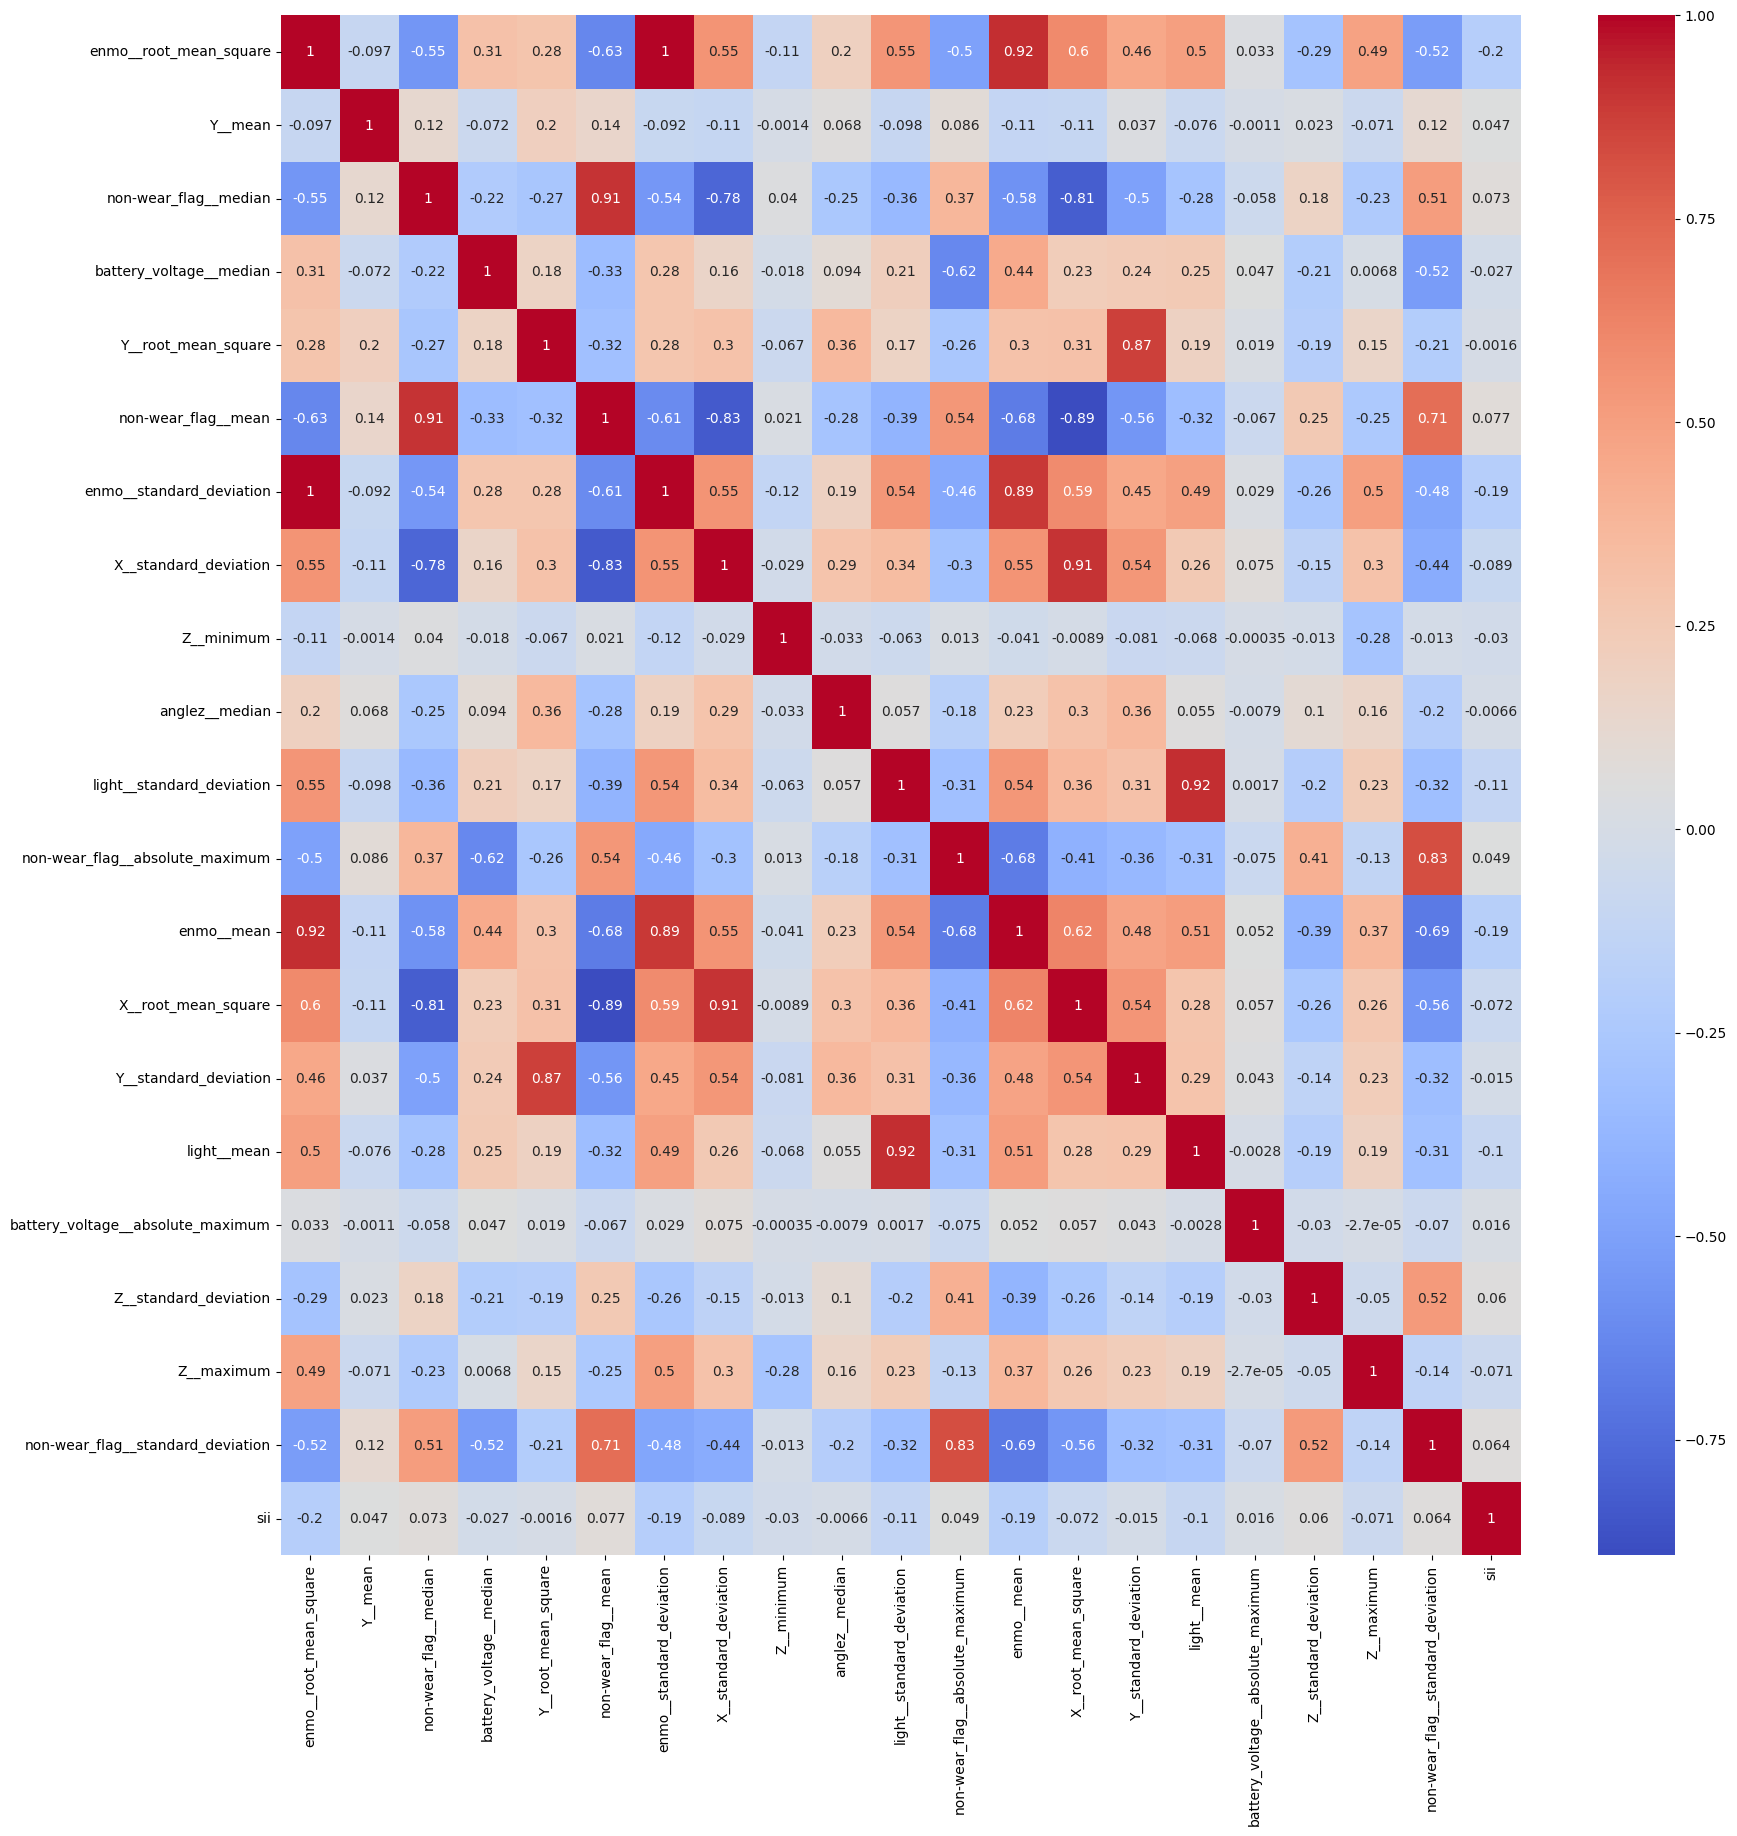

In [ ]:
cor1=(final_feature_train_data.drop(columns=['id'])).corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor1,annot=True,cmap='coolwarm')
plt.show()

- Againg from the correlation matrix we see that,enmo_root_mean_square and enmo_standard_deviation has correlation of 1. Hence, enmo_standard_deviation will be dropped as enmo_root_mean_square was top feature from Mutual information.

In [ ]:
final_feature_train_data['non-wear_flag__absolute_maximum'].value_counts()

non-wear_flag__absolute_maximum
1.0    516
0.0    280
Name: count, dtype: int64

In [ ]:
final_feature_train_data=final_feature_train_data.drop(columns=['enmo__standard_deviation'])
final_feature_test_data=final_feature_test_data.drop(columns=['enmo__standard_deviation'])


###   Figure 2: Distribution of data

- Following box plots are used to assess the distibution of data and check outliers visually.

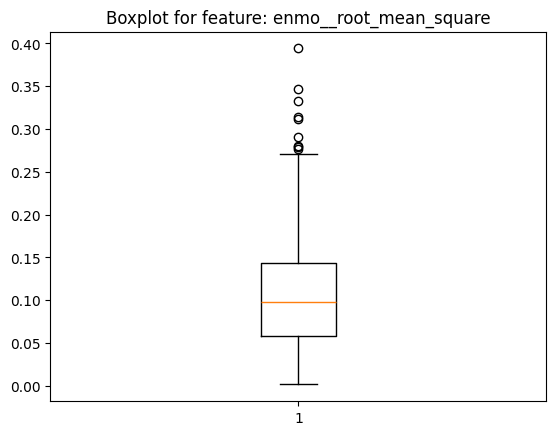

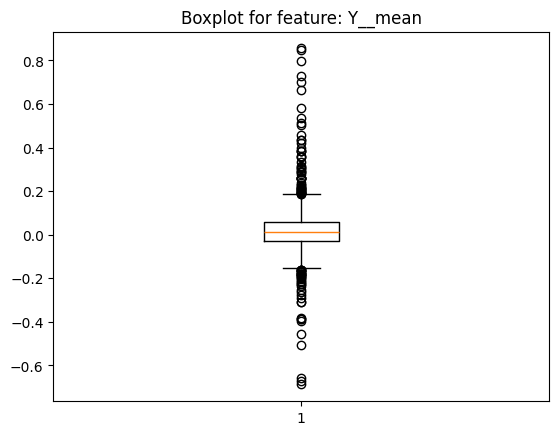

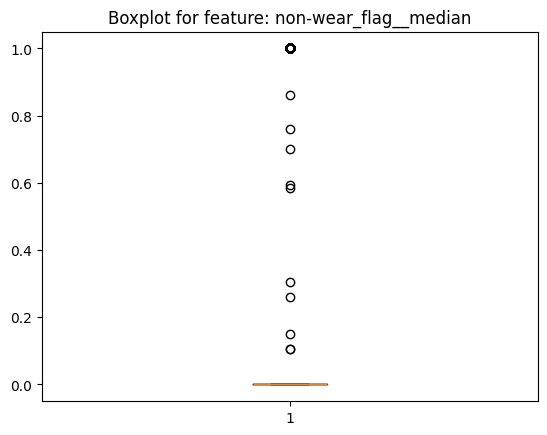

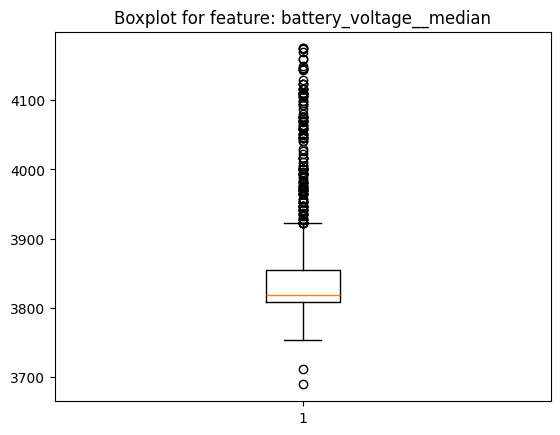

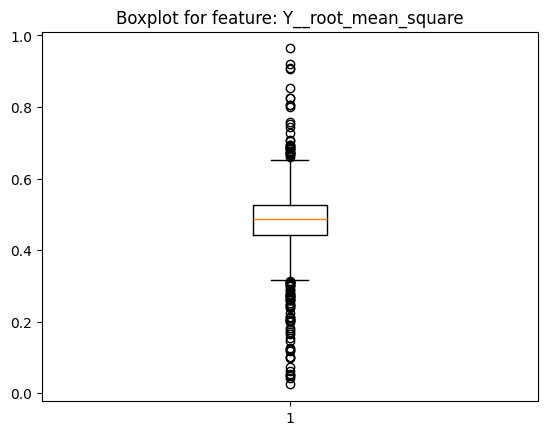

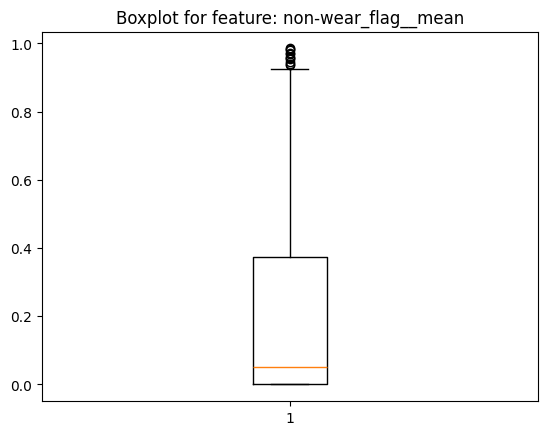

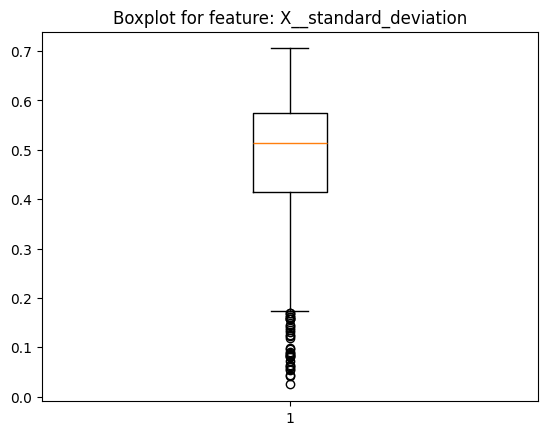

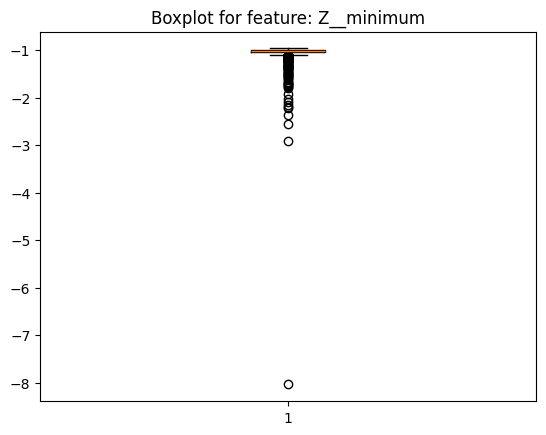

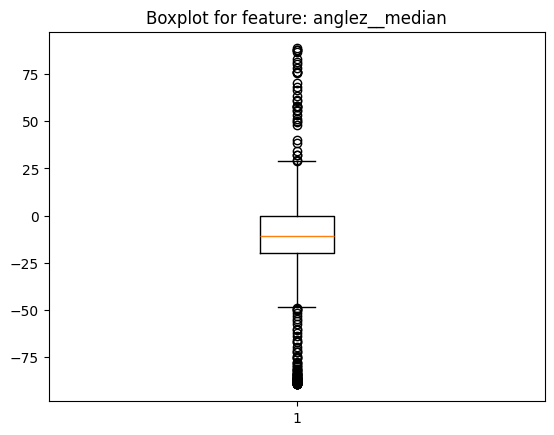

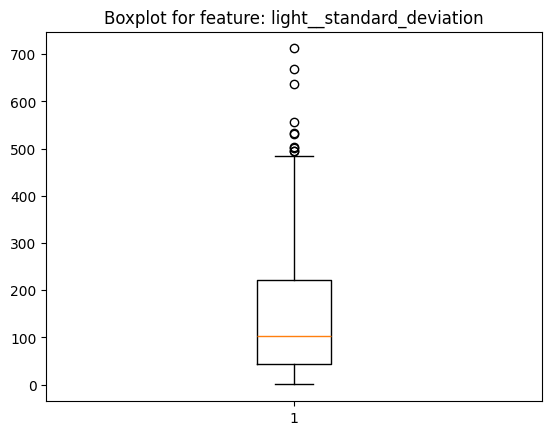

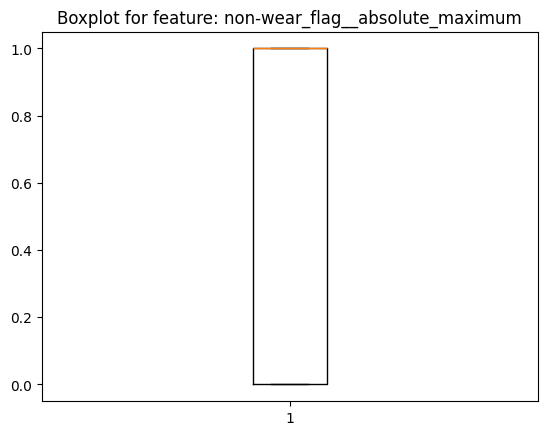

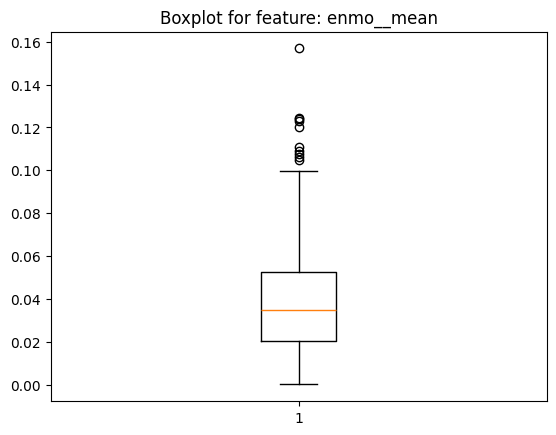

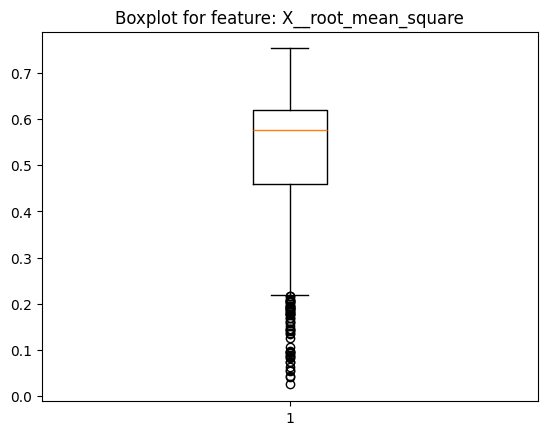

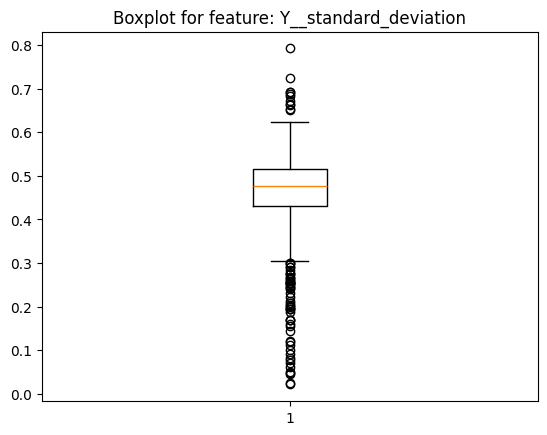

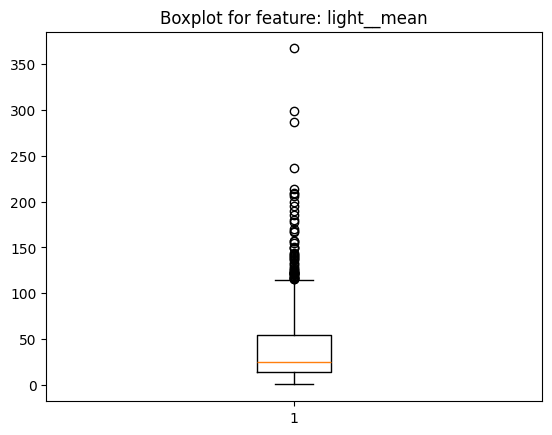

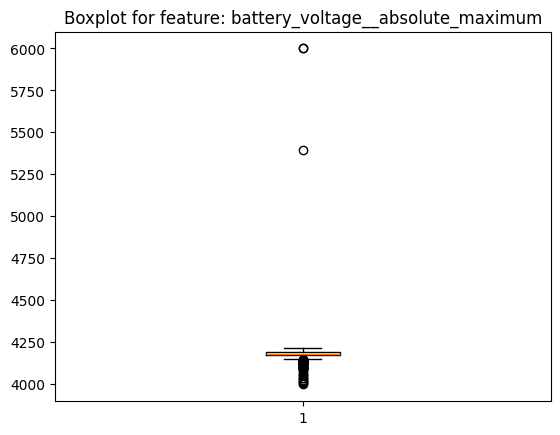

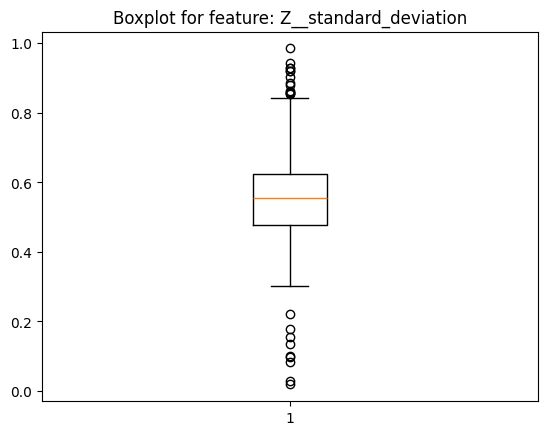

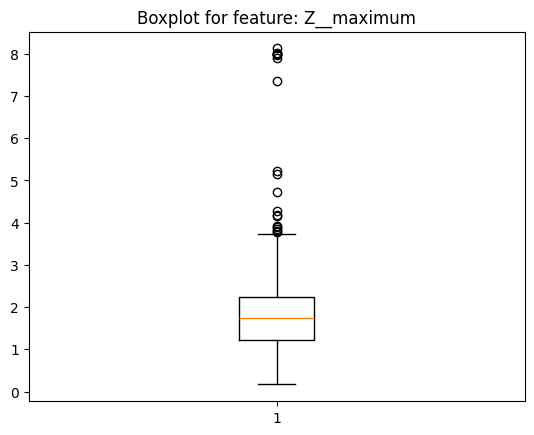

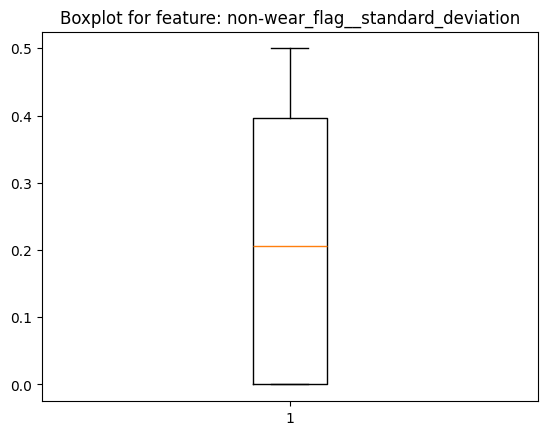

In [ ]:
for i in final_feature_train_data.select_dtypes(include=['int','float']).columns:
  plt.boxplot(final_feature_train_data[i])
  plt.title(f'Boxplot for feature: {i}')
  plt.show()

###   Table 2: Counting outliers

In [ ]:
# picking outliers after observing the box plots
print('outliers in Z__maximum : ',len(final_feature_train_data[(final_feature_train_data['Z__maximum'])>6]))
print('outliers in battery_voltage__absolute_maximum : ',len(final_feature_train_data[(final_feature_train_data['battery_voltage__absolute_maximum'])>5000]))
print('outliers in Z__minimum : ',len(final_feature_train_data[(final_feature_train_data['Z__minimum'])<-4]))
# this is picking number of ids where the watch was not worn for majority of time.
print('outliers in non-wear_flag__median : ',len(final_feature_train_data[(final_feature_train_data['non-wear_flag__median'])>0.6]))

outliers in Z__maximum :  8
outliers in battery_voltage__absolute_maximum :  3
outliers in Z__minimum :  1
outliers in non-wear_flag__median :  160


- Assessing outliers from the box plot will help us understand what is the cause for that value and if the vlaues are actually outliers.
- For eaxmple, non-wear_flag__median value of more than 0.5 should mean that the person is not wearing watch for the majority of time. There are 160 such people.
- A batterey voltage of more than 5mV for a watch is not right.
- We will not be dropping these outliers, which we ispected visually. Since, there are only 996 rows in total no data will be dropped.

In [ ]:
print(final_feature_train_data.isna().sum().sum())
print(final_feature_test_data.isna().sum().sum())

0
0


## Step 1.3.  Intial Model Building

- Based on the box lots above we see than there are many outliers. Hence, Tree based models like Gradient boosting and Random Forest classifiers will be used as there are robust to outliers and data distribution.
- In this section different models will be tested, these will be acting as a benchmark models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
final_feature_train_data['sii'].value_counts()

sii
0.0    463
1.0    333
Name: count, dtype: int64

In [ ]:
X_train=final_feature_train_data.drop(columns=['id','sii'])
y_train=final_feature_train_data['sii']
X_test=final_feature_test_data.drop(columns=['id','sii'])
y_test=final_feature_test_data['sii']


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(796, 19)
(796,)
(200, 19)
(200,)


In [ ]:
X_train.columns

Index(['enmo__root_mean_square', 'Y__mean', 'non-wear_flag__median',
       'battery_voltage__median', 'Y__root_mean_square', 'non-wear_flag__mean',
       'X__standard_deviation', 'Z__minimum', 'anglez__median',
       'light__standard_deviation', 'non-wear_flag__absolute_maximum',
       'enmo__mean', 'X__root_mean_square', 'Y__standard_deviation',
       'light__mean', 'battery_voltage__absolute_maximum',
       'Z__standard_deviation', 'Z__maximum',
       'non-wear_flag__standard_deviation'],
      dtype='object')

In [ ]:
sm=SMOTE(random_state=99,k_neighbors=5)
X_train_r,y_train_r=sm.fit_resample(X_train,y_train)
# scaler=MinMaxScaler()
# X_train_r=scaler.fit_transform(X_train_r)
# X_test=scaler.transform(X_test)

- There was no need for scalign as the models perfomred on par when the data was scaled and when the data was not scaled. Another advantage of Tree based models.

In [ ]:
y_train_r.value_counts()

sii
1.0    463
0.0    463
Name: count, dtype: int64

In [ ]:
#Random forest model

rfr = RandomForestClassifier(
    n_estimators=40,
    random_state=99,
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=5,
    max_features='sqrt'
)

rfr.fit(X_train_r,y_train_r)

train_pred_rfr=rfr.predict(X_train_r)
train_prob_rfr=rfr.predict_proba(X_train_r)[:,1]
test_pred_rfr=rfr.predict(X_test)
test_prob_rfr=rfr.predict_proba(X_test)[:,1]

#Metrics
print('Training metrics:')
print(confusion_matrix(y_train_r,train_pred_rfr))
print(classification_report(y_train_r,train_pred_rfr))
print('AUC score:',roc_auc_score(y_train_r,train_prob_rfr))
print('Testing metrics:')
print(confusion_matrix(y_test,test_pred_rfr))
print(classification_report(y_test,test_pred_rfr))
print('AUC score:',roc_auc_score(y_test,test_prob_rfr))


Training metrics:
[[277 186]
 [ 93 370]]
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67       463
         1.0       0.67      0.80      0.73       463

    accuracy                           0.70       926
   macro avg       0.71      0.70      0.70       926
weighted avg       0.71      0.70      0.70       926

AUC score: 0.8027513306494876
Testing metrics:
[[68 52]
 [24 56]]
              precision    recall  f1-score   support

         0.0       0.74      0.57      0.64       120
         1.0       0.52      0.70      0.60        80

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.65      0.62      0.62       200

AUC score: 0.6669791666666667


In [ ]:
#gradeient boostingmodel
gbc = GradientBoostingClassifier(
    random_state=99,
    n_estimators=30,
    learning_rate=0.05,
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=5,
    subsample=0.8
)
gbc.fit(X_train_r,y_train_r)

train_pred_gbc=gbc.predict(X_train_r)
train_prob_gbc=gbc.predict_proba(X_train_r)[:,1]
test_pred_gbc=gbc.predict(X_test)
test_prob_gbc=gbc.predict_proba(X_test)[:,1]

#Metrics
print('Training metrics:')
print(confusion_matrix(y_train_r,train_pred_gbc))
print(classification_report(y_train_r,train_pred_gbc))
print('AUC score:',roc_auc_score(y_train_r,train_prob_gbc))
print('Testing metrics:')
print(confusion_matrix(y_test,test_pred_gbc))
print(classification_report(y_test,test_pred_gbc))
print('AUC score:',roc_auc_score(y_test,test_prob_gbc))

Training metrics:
[[284 179]
 [116 347]]
              precision    recall  f1-score   support

         0.0       0.71      0.61      0.66       463
         1.0       0.66      0.75      0.70       463

    accuracy                           0.68       926
   macro avg       0.68      0.68      0.68       926
weighted avg       0.68      0.68      0.68       926

AUC score: 0.7463345912888524
Testing metrics:
[[64 56]
 [30 50]]
              precision    recall  f1-score   support

         0.0       0.68      0.53      0.60       120
         1.0       0.47      0.62      0.54        80

    accuracy                           0.57       200
   macro avg       0.58      0.58      0.57       200
weighted avg       0.60      0.57      0.57       200

AUC score: 0.6682812499999999


<function matplotlib.pyplot.show(close=None, block=None)>

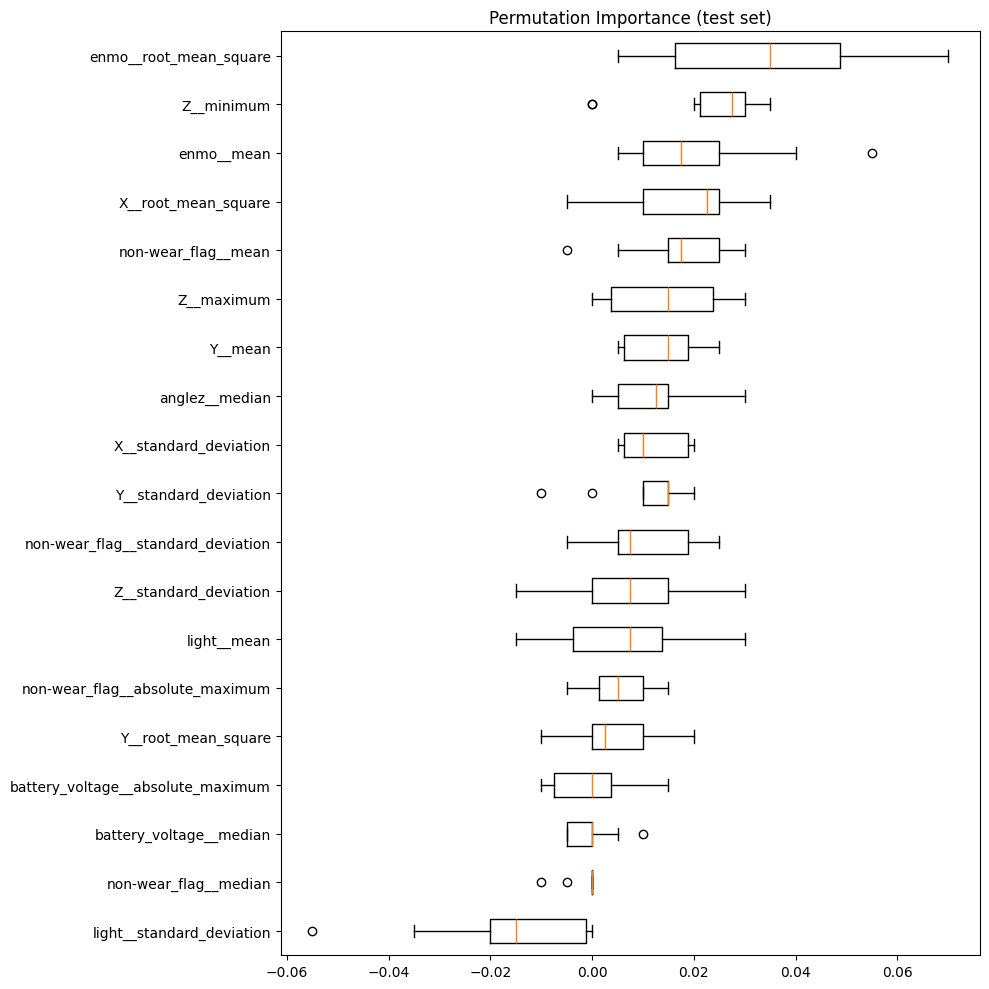

In [ ]:
from sklearn.inspection import permutation_importance

clf=rfr

result=permutation_importance(clf,X_test,y_test,n_repeats=10,random_state=99,n_jobs=10)
perm_sorted_idx=result.importances_mean.argsort()

fig,ax1=plt.subplots(1,1,figsize=(10,10))
ax1.boxplot(result.importances[perm_sorted_idx].T,vert=False,labels=X_test.columns[perm_sorted_idx])
ax1.set_title('Permutation Importance (test set)')
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

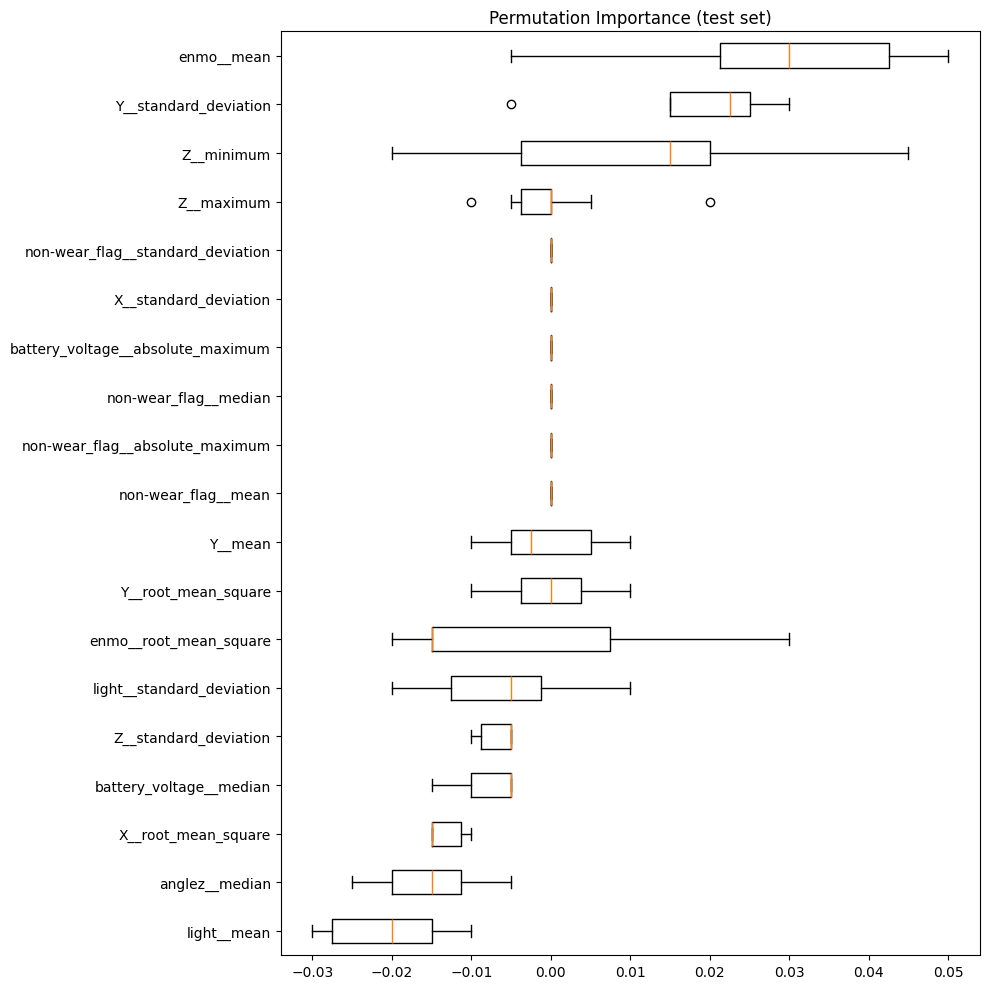

In [ ]:
from sklearn.inspection import permutation_importance

clf=gbc

result=permutation_importance(clf,X_test,y_test,n_repeats=10,random_state=99,n_jobs=10)
perm_sorted_idx=result.importances_mean.argsort()

fig,ax1=plt.subplots(1,1,figsize=(10,10))
ax1.boxplot(result.importances[perm_sorted_idx].T,vert=False,labels=X_test.columns[perm_sorted_idx])
ax1.set_title('Permutation Importance (test set)')
fig.tight_layout()
plt.show

# Step 2: Bringing Extra features from SomeFC data

In [ ]:
import os
# Convert IDs to a list
tr_ids = train_id['id'].to_list()
te_ids = test_id['id'].to_list()

# Define the base file path

SomeFC_results_TSfresh = '/content/drive/MyDrive/SomeFC_results-20241120T141936Z-001/SomeFC_results'

all_data_train = []
for i in tr_ids:
    try:
       path = os.path.join(SomeFC_results_TSfresh, f"id={i}.csv")
       data = pd.read_csv(path)
       data['id'] = i
       all_data_train.append(data)
    except Exception as e:
        # Print the error and continue with the next file
        print(f"Error processing ID {i}: {e}")

all_data_test = []
for i in te_ids:
    try:
       path = os.path.join(SomeFC_results_TSfresh, f"id={i}.csv")
       data = pd.read_csv(path)
       data['id'] = i
       all_data_test.append(data)
    except Exception as e:
        # Print the error and continue with the next file
        print(f"Error processing ID {i}: {e}")

# Combine all the DataFrames into a single DataFrame
SomeFC_all_train_data = pd.concat(all_data_train, ignore_index=True)
SomeFC_all_test_data = pd.concat(all_data_test, ignore_index=True)

# Merge the final DataFrame with id and target variable sii
SomeFC_train_data=pd.merge(SomeFC_all_train_data,train_id[['id','sii']],on='id',how='left')
SomeFC_test_data = pd.merge(SomeFC_all_test_data,test_id[['id','sii']],on='id',how='left')



Error processing ID nan: [Errno 2] No such file or directory: '/content/drive/MyDrive/SomeFC_results-20241120T141936Z-001/SomeFC_results/id=nan.csv'
Error processing ID nan: [Errno 2] No such file or directory: '/content/drive/MyDrive/SomeFC_results-20241120T141936Z-001/SomeFC_results/id=nan.csv'


In [ ]:
# Check the shape of Some FC train data
SomeFC_train_data.shape


(796, 2186)

In [ ]:
# Check the shape of Some FC test data
SomeFC_test_data.shape

(200, 2186)

## 2.2. Filtering a table for Some_FC_train data by removing highly correlated pairs to reduce the complexity of data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix while ignoring 'id'
correlation_matrix_SomeFC_train = SomeFC_train_data.loc[:, SomeFC_train_data.columns != 'id'].corr()

# Here we considered 0.7 as the value to define highly correlated pairs

# If 2 columns have correlation greater than 0.7, we are excluding one out of them.

# Filter the correlation matrix to show only correlations greater than 0.7 (excluding diagonal)
Higher_correlation_pairs_SomeFC_train = correlation_matrix_SomeFC_train.where((correlation_matrix_SomeFC_train > 0.7) & (correlation_matrix_SomeFC_train < 1))

# Convert the filtered correlations into a tidy format for display
filtered_correlation_SomeFC_train = Higher_correlation_pairs_SomeFC_train.stack().reset_index()
filtered_correlation_SomeFC_train.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the filtered table
print(filtered_correlation_SomeFC_train)


                            Feature 1  \
0                       X__abs_energy   
1                       X__abs_energy   
2                       X__abs_energy   
3                       X__abs_energy   
4                       X__abs_energy   
...                               ...   
65475  weekday__variation_coefficient   
65476  weekday__variation_coefficient   
65477  weekday__variation_coefficient   
65478  weekday__variation_coefficient   
65479  weekday__variation_coefficient   

                                              Feature 2  Correlation  
0                            X__absolute_sum_of_changes     0.927466  
1                            X__cid_ce__normalize_False     0.906331  
2                             X__cid_ce__normalize_True     0.706077  
3                             X__number_crossing_m__m_0     0.844338  
4                              X__number_cwt_peaks__n_5     0.728276  
...                                                 ...          ...  
65475     

In [ ]:
# Keep only one row per 'Feature 1' (e.g., the first occurrence)
final_table = filtered_correlation_SomeFC_train.drop_duplicates(subset=['Feature 1'], keep='first')

# Display the final table
print(final_table)

                                               Feature 1  \
0                                          X__abs_energy   
52                            X__absolute_sum_of_changes   
97       X__agg_autocorrelation__f_agg_"mean"__maxlag_40   
108    X__agg_autocorrelation__f_agg_"median"__maxlag_40   
119       X__agg_autocorrelation__f_agg_"var"__maxlag_40   
...                                                  ...   
65262  weekday__time_reversal_asymmetry_statistic__lag_3   
65264                      weekday__value_count__value_1   
65446                                  weekday__variance   
65453   weekday__variance_larger_than_standard_deviation   
65475                     weekday__variation_coefficient   

                                               Feature 2  Correlation  
0                             X__absolute_sum_of_changes     0.927466  
52                                         X__abs_energy     0.927466  
97     X__agg_autocorrelation__f_agg_"median"__maxlag_40     0.

In [ ]:
# Extract the unique columns in 'Feature 2' from the final correlation table
columns_to_drop = final_table['Feature 2'].unique()

# Drop these columns from SomeFC_train_data
SomeFC_train_data = SomeFC_train_data.drop(columns=columns_to_drop, errors='ignore')

# Check the head of Some FC train data again
SomeFC_train_data.head()


X__ar_coefficient__coeff_10__k_10  X__ar_coefficient__coeff_1__k_10  \
0                           0.002699                          0.564373   
1                           0.071953                          0.340693   
2                           0.000000                          0.000000   
3                           0.101024                          0.134380   
4                           0.001137                          0.317845   

   X__ar_coefficient__coeff_2__k_10  X__ar_coefficient__coeff_4__k_10  \
0                          0.102408                          0.053526   
1                          0.120949                          0.022008   
2                          0.000000                          0.000000   
3                          0.134696                          0.099969   
4                          0.116325                         -0.017653   

   X__ar_coefficient__coeff_7__k_10  \
0                          0.017840   
1                          0.031657   
2                          0.000000   
3                          0.029380   
4                          0.023847   

   X__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"  \
0                                       4.273405e-22          
1                                       9.989604e-13          
2                                       1.853568e-02          
3                                       1.107780e-02          
4                                       9.699873e-20          

   X__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"  \
0                                         -11.953001            
1                                          -8.145929            
2                                          -3.225861            
3                                          -3.396528            
4                                         -10.933304            

   X__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"  \
0                                                3.0           
1                                                9.0           
2                                                0.0           
3                                                9.0           
4                                                8.0           

   X__autocorrelation__lag_0  X__autocorrelation__lag_2  ...  \
0                        1.0                   0.554140  ...   
1                        1.0                   0.383889  ...   
2                        1.0                  -0.191268  ...   
3                        1.0                   0.449248  ...   
4                        1.0                   0.264240  ...   

   weekday__time_reversal_asymmetry_statistic__lag_1  \
0                                           0.169830   
1                                           0.115263   
2                                         -23.800000   
3                                           0.244152   
4                                           0.057002   

   weekday__time_reversal_asymmetry_statistic__lag_2  \
0                                           0.340000   
1                                           0.230769   
2                                         -55.000000   
3                                           0.475073   
4                                           0.114117   

   weekday__time_reversal_asymmetry_statistic__lag_3  \
0                                           0.510511   
1                                           0.346519   
2                                         -44.000000   
3                                           0.716176   
4                                           0.171344   

   weekday__value_count__value_-1  weekday__value_count__value_0  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            

In [ ]:
# Find non-numeric columns
non_numeric_cols = [col for col in SomeFC_train_data.columns if SomeFC_train_data[col].dtype == 'object']
print(f"Non-numeric columns: {non_numeric_cols}")

# Replace all infinity values with NaN in the dataset
SomeFC_train_data = SomeFC_train_data.applymap(lambda x: np.nan if x in [np.inf, -np.inf] else x)

# Confirm that no infinities remain in the dataset
has_infinity = SomeFC_train_data.isin([np.inf, -np.inf]).any().any()
print(f"Dataset contains infinity values: {has_infinity}")


Non-numeric columns: ['id', 'sii']


<ipython-input-47-1d6af03351ea>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  SomeFC_train_data = SomeFC_train_data.applymap(lambda x: np.nan if x in [np.inf, -np.inf] else x)


Dataset contains infinity values: False


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold to all columns except 'id'
selector = VarianceThreshold(threshold=0.01)
numeric_columns = SomeFC_train_data.columns.difference(['id'])  # Exclude 'id'
reduced_data = selector.fit_transform(SomeFC_train_data[numeric_columns])

# Get retained columns
retained_columns = numeric_columns[selector.get_support()]

# Create a DataFrame with the retained columns and keep 'id' intact
SomeFC_train_data = pd.concat(
    [SomeFC_train_data[['id']], SomeFC_train_data[retained_columns]],
    axis=1
)

print(SomeFC_train_data.shape)


(796, 918)


In [ ]:
# Check the shape of the Some FC train data again
SomeFC_train_data.head()

id  X__ar_coefficient__coeff_1__k_10  \
0  a0522c83                          0.564373   
1  4a4a0f78                          0.340693   
2  a8b0428d                          0.000000   
3  6282e693                          0.134380   
4  a4530b41                          0.317845   

   X__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"  \
0                                         -11.953001            
1                                          -8.145929            
2                                          -3.225861            
3                                          -3.396528            
4                                         -10.933304            

   X__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"  \
0                                                3.0           
1                                                9.0           
2                                                0.0           
3                                                9.0           
4                                                8.0           

   X__autocorrelation__lag_2  X__autocorrelation__lag_3  \
0                   0.554140                   0.468064   
1                   0.383889                   0.331265   
2                  -0.191268                   0.190737   
3                   0.449248                   0.448073   
4                   0.264240                   0.183540   

   X__autocorrelation__lag_4  X__autocorrelation__lag_5  \
0                   0.410879                   0.350711   
1                   0.289319                   0.281509   
2                  -0.011104                  -0.395159   
3                   0.439540                   0.444261   
4                   0.115118                   0.106993   

   X__autocorrelation__lag_6  X__autocorrelation__lag_7  ...  \
0                   0.313023                   0.275830  ...   
1                   0.285430                   0.258809  ...   
2                  -0.586833                   0.000000  ...   
3                   0.418939                   0.394441  ...   
4                   0.121441                   0.110867  ...   

   weekday__sum_of_reoccurring_values  weekday__sum_values  \
0                                28.0               8042.0   
1                                28.0               7410.0   
2                                11.0                 37.0   
3                                28.0               2519.0   
4                                28.0               8559.0   

   weekday__symmetry_looking__r_0.1  weekday__symmetry_looking__r_0.2  \
0                               1.0                               1.0   
1                               1.0                               1.0   
2                               0.0                               1.0   
3                               1.0                               1.0   
4                               1.0                               1.0   

   weekday__time_reversal_asymmetry_statistic__lag_1  \
0                                           0.169830   
1                                           0.115263   
2                                         -23.800000   
3                                           0.244152   
4                                           0.057002   

   weekday__time_reversal_asymmetry_statistic__lag_2  \
0                                           0.340000   
1                                           0.230769   
2                                         -55.000000   
3                                           0.475073   
4                                           0.114117   

   weekday__time_reversal_asymmetry_statistic__lag_3  \
0                                           0.510511   
1                                           0.346519   
2                                         -44.000000   
3                                           0.716176   
4                                           0.171344   

   weekday__value_co

In [ ]:
# Compute correlation of all columns except 'id' with the target ('sii')
corr_with_sii = SomeFC_train_data.loc[:, SomeFC_train_data.columns != 'id'].corrwith(SomeFC_train_data['sii'])

# Keep features with absolute correlation above a threshold (e.g., 0.1)
important_correlated_features = corr_with_sii[abs(corr_with_sii) > 0.1].index

# Include 'id' column in the final DataFrame
SomeFC_train_data = SomeFC_train_data[['id'] + list(important_correlated_features)]

print(SomeFC_train_data.shape)



(796, 39)


In [ ]:
# Make sure columns in test matches the train data

selected_columns = SomeFC_train_data.columns

SomeFC_test_data = SomeFC_test_data[selected_columns]

SomeFC_test_data.head()

id  X__spkt_welch_density__coeff_2  \
0  d8037389                        3.370859   
1  fa34f945                        0.666024   
2  15f2e240                        6.431561   
3  98ed2153                        5.237866   
4  7187caec                        3.114588   

   Y__agg_autocorrelation__f_agg_"median"__maxlag_40  \
0                                           0.563519   
1                                           0.610423   
2                                           0.006544   
3                                           0.405706   
4                                           0.349897   

   Y__autocorrelation__lag_3  Y__autocorrelation__lag_4  \
0                   0.737060                   0.720854   
1                   0.804231                   0.795908   
2                   0.080947                   0.063775   
3                   0.586982                   0.559598   
4                   0.582296                   0.567159   

   Y__autocorrelation__lag_5  Y__autocorrelation__lag_6  \
0                   0.697042                   0.691114   
1                   0.786156                   0.769974   
2                   0.026793                   0.039918   
3                   0.536766                   0.533961   
4                   0.576308                   0.546749   

   Y__autocorrelation__lag_7  Y__benford_correlation  \
0                   0.676965                0.146830   
1                   0.755957                0.573172   
2                   0.056221                0.922203   
3                   0.521267                0.196987   
4                   0.536166                0.828718   

   Y__cid_ce__normalize_True  ...  light__number_peaks__n_3  \
0                  25.142955  ...                      74.0   
1                  25.740893  ...                      29.0   
2                  43.195368  ...                     123.0   
3                  37.785616  ...                      92.0   
4                  36.925125  ...                      98.0   

   light__number_peaks__n_5  light__permutation_entropy__dimension_3__tau_1  \
0                      50.0                                        1.190702   
1                      22.0                                        0.818621   
2                      84.0                                        1.749604   
3                      70.0                                        1.169721   
4                      68.0                                        1.115770   

   light__permutation_entropy__dimension_4__tau_1  \
0                                        1.780315   
1                                        1.018312   
2                                        3.066038   
3                                        1.751061   
4                                        1.708692   

   light__permutation_entropy__dimension_5__tau_1  \
0                                        2.362400   
1                                        1.194625   
2                                        4.538255   
3                                        2.329869   
4                                        2.279474   

   light__permutation_entropy__dimension_6__tau_1  \
0                                        2.833168   
1                                        1.343204   
2                                        5.868718   
3                                        2.799653   
4                                        2.753265   

   light__permutation_entropy__dimension_7__tau_1  light__root_mean_square  \
0                                        3.119661               183.301399   
1                                        1.467192                10.829589   
2                                        6.519396               369.872543   
3                                        3.083708                85.009849   
4                                        3.027050                26.012847   

   light__standard_deviation  sii  
0                 179.4766

In [ ]:
SomeFC_train_data.shape

(796, 39)

In [ ]:
SomeFC_train_data.head()



id  X__spkt_welch_density__coeff_2  \
0  a0522c83                        5.445997   
1  4a4a0f78                        3.784874   
2  a8b0428d                        0.235828   
3  6282e693                        1.315554   
4  a4530b41                        2.767376   

   Y__agg_autocorrelation__f_agg_"median"__maxlag_40  \
0                                           0.015717   
1                                           0.017713   
2                                           0.015676   
3                                           0.015244   
4                                           0.054633   

   Y__autocorrelation__lag_3  Y__autocorrelation__lag_4  \
0                   0.166023                   0.116930   
1                   0.147792                   0.080407   
2                  -0.372585                  -0.029713   
3                   0.040525                   0.023384   
4                   0.159942                   0.160411   

   Y__autocorrelation__lag_5  Y__autocorrelation__lag_6  \
0                   0.095225                   0.068891   
1                   0.093727                   0.036905   
2                   0.381868                   0.061066   
3                   0.080549                   0.034435   
4                   0.129317                   0.140560   

   Y__autocorrelation__lag_7  Y__benford_correlation  \
0                   0.060031                0.992944   
1                   0.045368                0.854408   
2                   0.000000               -0.197263   
3                   0.012464                0.715354   
4                   0.112446                0.739745   

   Y__cid_ce__normalize_True  ...  light__number_peaks__n_3  \
0                  50.924519  ...                      76.0   
1                  51.854170  ...                     126.0   
2                   3.528760  ...                       0.0   
3                  35.580171  ...                      80.0   
4                  54.063623  ...                     138.0   

   light__number_peaks__n_5  light__permutation_entropy__dimension_3__tau_1  \
0                      58.0                                        1.093173   
1                      86.0                                        1.397924   
2                       0.0                                        0.500402   
3                      57.0                                        1.750091   
4                      95.0                                        1.448764   

   light__permutation_entropy__dimension_4__tau_1  \
0                                        1.547313   
1                                        2.182781   
2                                        0.562335   
3                                        3.039015   
4                                        2.298807   

   light__permutation_entropy__dimension_5__tau_1  \
0                                        1.996382   
1                                        2.991382   
2                                        0.636514   
3                                        4.468012   
4                                        3.167225   

   light__permutation_entropy__dimension_6__tau_1  \
0                                        2.382397   
1                                        3.743593   
2                                        0.693147   
3                                        5.667060   
4                                        3.945581   

   light__permutation_entropy__dimension_7__tau_1  light__root_mean_square  \
0                                        2.656049                94.205914   
1                                        4.221211               116.343672   
2                                        0.000000                28.301072   
3                                        6.189374               347.567051   
4                                        4.419044                62.072928   

   light__standard_deviation  sii  
0                  91.7223

In [ ]:
# Create the final Train and test data for the Some FC

# Here we are not dropping the id column now because we need that to join the data with X_train and other data

X_train_SomeFC = SomeFC_train_data.drop(columns=['sii'])

X_test_SomeFC = SomeFC_test_data.drop(columns=['sii'])



In [ ]:
print('X_train_someFC:',X_train_SomeFC.isna().sum().sum() )
print('X_test_someFC:',X_test_SomeFC.isna().sum().sum() )

X_train_someFC: 0
X_test_someFC: 0


# Step 3: Bringing Extra Features from Demographics data

In [ ]:
dd=pd.read_csv('/content/drive/MyDrive/data_dictionary.csv')
dd.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/train.csv')


In [ ]:
train_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [ ]:
import os
import pandas as pd

# Step 1: List folder IDs
folder_path = '/content/drive/MyDrive/series_train.parquet'
folder_ids = set(folder_name.replace('id=', '') for folder_name in os.listdir(folder_path))

# Step 2: Load dataset and extract IDs
dataset_ids = set(train_df['id'].astype(str))

# Step 3: Find common IDs
common_ids = dataset_ids.intersection(folder_ids)

#Filtering dataset based on common ids from paraquet files
train_df2=train_df[train_df['id'].isin(common_ids)]

In [ ]:
train_df2.shape

(996, 82)

In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 3 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Basic_Demos-Enroll_Season               996 non-null    object 
 2   Basic_Demos-Age                         996 non-null    int64  
 3   Basic_Demos-Sex                         996 non-null    int64  
 4   CGAS-Season                             954 non-null    object 
 5   CGAS-CGAS_Score                         954 non-null    float64
 6   Physical-Season                         992 non-null    object 
 7   Physical-BMI                            985 non-null    float64
 8   Physical-Height                         988 non-null    float64
 9   Physical-Weight                         986 non-null    float64
 10  Physical-Waist_Circumference            47 non-null     float64
 1

In [ ]:
# prompt: in train_df2 drop columns with iloc[:,55:76] and then drop columns where there are more than 10% missing values

# Drop columns with iloc[:,55:76]
train_df2 = train_df2.drop(train_df2.iloc[:, 55:76].columns, axis=1)

#dropping columns which ahve more than 10% missing values
to_keep=[]
for column in train_df2.columns:
    if train_df2[column].isna().sum()/train_df2.shape[0]<=0.1:
        to_keep.append(column)
train_df2=train_df2[to_keep]

In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 3 to 3958
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Basic_Demos-Enroll_Season               996 non-null    object 
 2   Basic_Demos-Age                         996 non-null    int64  
 3   Basic_Demos-Sex                         996 non-null    int64  
 4   CGAS-Season                             954 non-null    object 
 5   CGAS-CGAS_Score                         954 non-null    float64
 6   Physical-Season                         992 non-null    object 
 7   Physical-BMI                            985 non-null    float64
 8   Physical-Height                         988 non-null    float64
 9   Physical-Weight                         986 non-null    float64
 10  Physical-Diastolic_BP                   979 non-null    float64
 1

In [ ]:

for i in train_df2.columns:
  print(i)
  print(train_df2[i].value_counts())

id
id
00115b9f    1
aa1700c7    1
a6fbb2e7    1
a774c63b    1
a7b9546a    1
           ..
5264bb0e    1
526f719b    1
52ce9b8b    1
52e9e467    1
ffed1dd5    1
Name: count, Length: 996, dtype: int64
Basic_Demos-Enroll_Season
Basic_Demos-Enroll_Season
Spring    270
Fall      263
Summer    246
Winter    217
Name: count, dtype: int64
Basic_Demos-Age
Basic_Demos-Age
9     135
8     121
10    110
7     105
6      98
12     84
11     70
14     55
13     51
15     44
16     31
17     30
5      28
18     17
19      7
20      5
21      5
Name: count, dtype: int64
Basic_Demos-Sex
Basic_Demos-Sex
0    651
1    345
Name: count, dtype: int64
CGAS-Season
CGAS-Season
Spring    311
Winter    259
Fall      204
Summer    180
Name: count, dtype: int64
CGAS-CGAS_Score
CGAS-CGAS_Score
60.0    138
55.0     90
65.0     85
80.0     75
70.0     74
61.0     54
75.0     50
50.0     47
45.0     40
85.0     37
51.0     20
63.0     19
71.0     17
62.0     16
68.0     16
78.0     13
41.0     13
58.0     12
90.0     

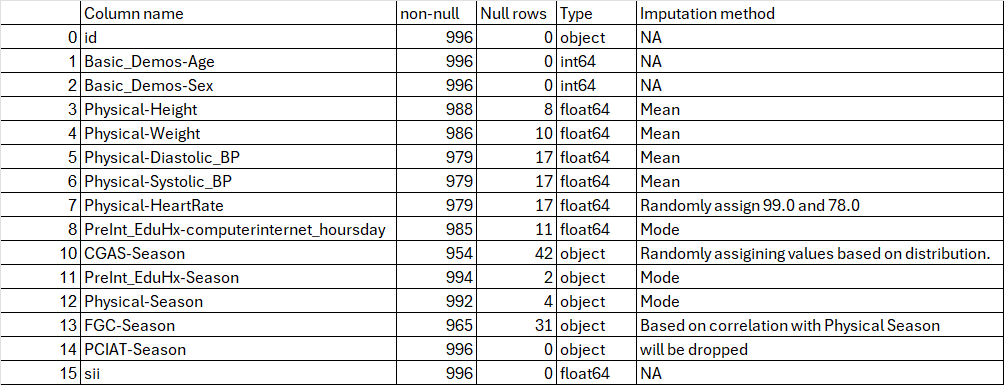

In [ ]:
# Recategorize 'sii' to 0.0 and 1.0
train_df2['sii'] = train_df2['sii'].apply(lambda x: 0.0 if x == 0.0 else 1.0)

# Check the value counts
train_df2['sii'].value_counts()

sii
0.0    583
1.0    413
Name: count, dtype: int64

In [ ]:
demo_df=train_df2.copy()

In [ ]:
#filling the missing values using the above imputation strategy for column
train_df2['Physical-Height']=train_df2['Physical-Height'].fillna(train_df2['Physical-Height'].mean())
train_df2['Physical-Weight']=train_df2['Physical-Weight'].fillna(train_df2['Physical-Weight'].mean())
train_df2['Physical-Diastolic_BP']=train_df2['Physical-Diastolic_BP'].fillna(train_df2['Physical-Diastolic_BP'].mode()[0])
train_df2['Physical-Systolic_BP']=train_df2['Physical-Systolic_BP'].fillna(train_df2['Physical-Systolic_BP'].mode()[0])
train_df2['PreInt_EduHx-computerinternet_hoursday']=train_df2['PreInt_EduHx-computerinternet_hoursday'].fillna(train_df2['PreInt_EduHx-computerinternet_hoursday'].mode()[0])
train_df2['PreInt_EduHx-Season']=train_df2['PreInt_EduHx-Season'].fillna(train_df2['PreInt_EduHx-Season'].mode()[0])
train_df2['Physical-Season']=train_df2['Physical-Season'].fillna(train_df2['Physical-Season'].mode()[0])
train_df2['CGAS-CGAS_Score']=train_df2['CGAS-CGAS_Score'].fillna(train_df2['CGAS-CGAS_Score'].mode()[0])


In [ ]:
# prompt: for the column Physical-HeartRate fill the missing values by randomly assigning top 2 values from the column with approximately 50-50 split. For any random function assign a random seed

np.random.seed(42)  # Set a random seed for reproducibility

# Find the top 2 most frequent values in 'Physical-HeartRate'
top_values = train_df2['Physical-HeartRate'].value_counts().index[:2]

# Calculate the number of missing values
num_missing = train_df2['Physical-HeartRate'].isnull().sum()

# Split the missing values approximately 50-50 between the top 2 values
num_top1 = round(num_missing / 2)
num_top2 = num_missing - num_top1

# Create a list of values to fill in the missing values
fill_values = [top_values[0]] * num_top1 + [top_values[1]] * num_top2

# Shuffle the fill values to randomize the assignment
np.random.seed(99)
np.random.shuffle(fill_values)

# Fill in the missing values with the randomly assigned top 2 values
train_df2.loc[train_df2['Physical-HeartRate'].isnull(), 'Physical-HeartRate'] = fill_values

In [ ]:
np.random.seed(99)

# Find the values in 'CGAS-Season'
top_values = train_df2['CGAS-Season'].value_counts().index[:4]

# Calculate the number of missing values
num_missing = train_df2['CGAS-Season'].isnull().sum()

# Calculate the distribution of values
value_counts = train_df2['CGAS-Season'].value_counts().iloc[:4]
value_probs = value_counts / value_counts.sum()

# Generate a list of values to fill in the missing values based on the distribution
fill_values = np.random.choice(top_values, size=num_missing, p=value_probs)

# Fill in the missing values with the randomly assigned values based on their distribution
train_df2.loc[train_df2['CGAS-Season'].isnull(), 'CGAS-Season'] = fill_values

In [ ]:
# Fill missing values in 'FGC-Season' with values from 'Physical-Season' where available
train_df2['FGC-Season'] = train_df2['FGC-Season'].fillna(train_df2['Physical-Season'])

In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 3 to 3958
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Basic_Demos-Enroll_Season               996 non-null    object 
 2   Basic_Demos-Age                         996 non-null    int64  
 3   Basic_Demos-Sex                         996 non-null    int64  
 4   CGAS-Season                             996 non-null    object 
 5   CGAS-CGAS_Score                         996 non-null    float64
 6   Physical-Season                         996 non-null    object 
 7   Physical-BMI                            985 non-null    float64
 8   Physical-Height                         996 non-null    float64
 9   Physical-Weight                         996 non-null    float64
 10  Physical-Diastolic_BP                   996 non-null    float64
 1

### Figure 3: Correlation matrix for demographics data

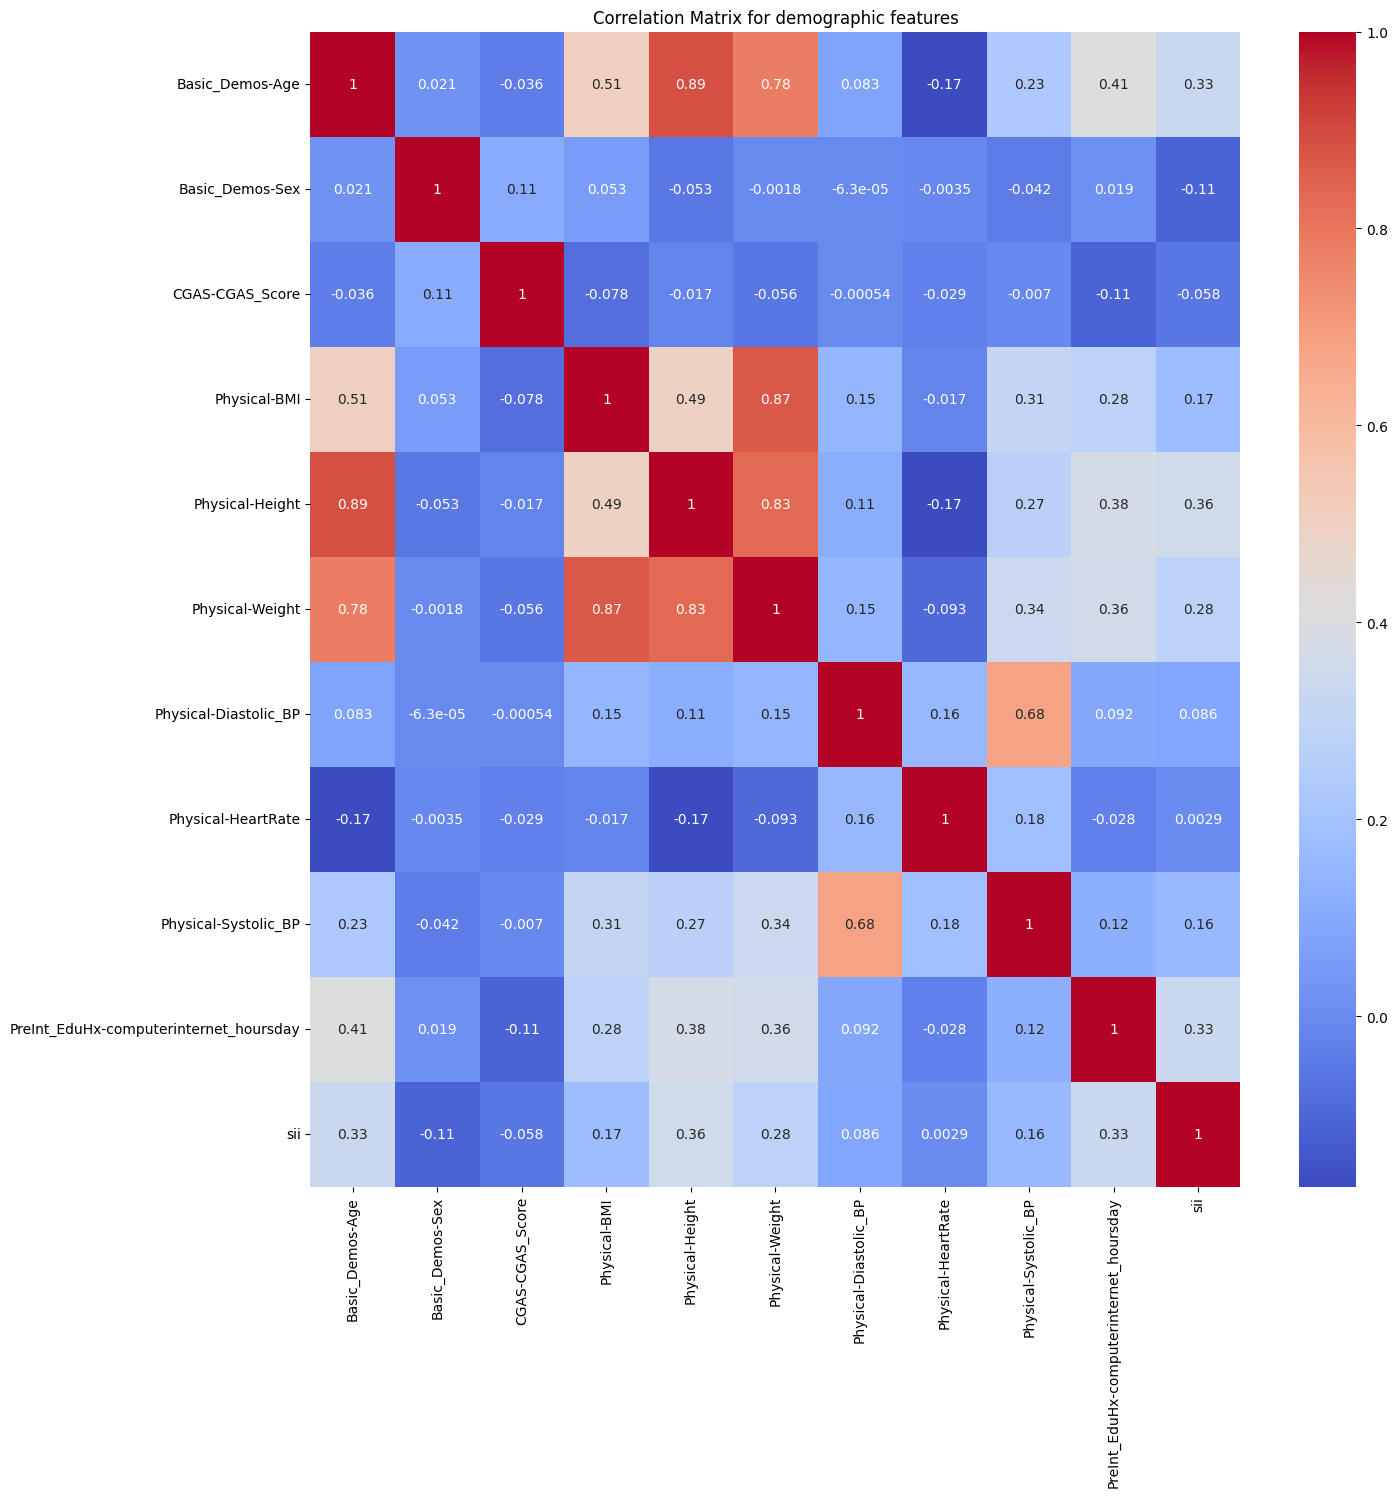

In [ ]:
cor2=train_df2.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor2,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for demographic features')
plt.show()

- We will drop Physical-BMI as it is less correlated to target and highly correlated with Height and Weight.


In [ ]:
#Dropping PCIAT Season column as all PCIAT columns were dropped

train_df2=train_df2.drop(columns=['PCIAT-Season'])
#One hot encoding categorical variables
train_df2=pd.get_dummies(train_df2,columns=['Basic_Demos-Enroll_Season','CGAS-Season', 'PreInt_EduHx-Season', 'Physical-Season', 'FGC-Season'],dtype=int)
train_df2.head()

id  Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
3   00115b9f                9                0             71.0     18.292347   
5   001f3379               13                1             50.0     22.279952   
20  00f332d1               14                0             68.0     17.168636   
22  01085eb3               12                0             58.0     34.187282   
25  012cadd8                9                0             60.0     17.089151   

    Physical-Height  Physical-Weight  Physical-Diastolic_BP  \
3              56.0             81.6                   60.0   
5              59.5            112.2                   60.0   
20             66.5            108.0                   60.0   
22             60.5            178.0                   67.0   
25             53.2             68.8                   62.0   

    Physical-HeartRate  Physical-Systolic_BP  ...  PreInt_EduHx-Season_Summer  \
3                 97.0                 117.0  ...                           0   
5                 73.0                 102.0  ...                           0   
20                71.0                 129.0  ...                           0   
22                81.0                 119.0  ...                           0   
25                88.0                 123.0  ...                           0   

    PreInt_EduHx-Season_Winter  Physical-Season_Fall  Physical-Season_Spring  \
3                            1                     0                       0   
5                            0                     0                       0   
20                           1                     0                       1   
22                           0                     1                       0   
25                           0                     1                       0   

    Physical-Season_Summer  Physical-Season_Winter  FGC-Season_Fall  \
3                        1                       0                0   
5                        1                       0                0   
20                       0                       0                0   
22                       0                       0                1   
25                       0                       0                1   

    FGC-Season_Spring  FGC-Season_Summer  FGC-Season_Winter  
3                   0                  1                  0  
5                   0                  1                  0  
20                  1                  0                  0  
22                  0                  0                  0  
25                  0                  0                  0  

[5 rows x 32 columns]

In [ ]:
train_df2=train_df2.drop(columns=['Physical-BMI'])

In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 3 to 3958
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Basic_Demos-Age                         996 non-null    int64  
 2   Basic_Demos-Sex                         996 non-null    int64  
 3   CGAS-CGAS_Score                         996 non-null    float64
 4   Physical-Height                         996 non-null    float64
 5   Physical-Weight                         996 non-null    float64
 6   Physical-Diastolic_BP                   996 non-null    float64
 7   Physical-HeartRate                      996 non-null    float64
 8   Physical-Systolic_BP                    996 non-null    float64
 9   PreInt_EduHx-computerinternet_hoursday  996 non-null    float64
 10  sii                                     996 non-null    float64
 1

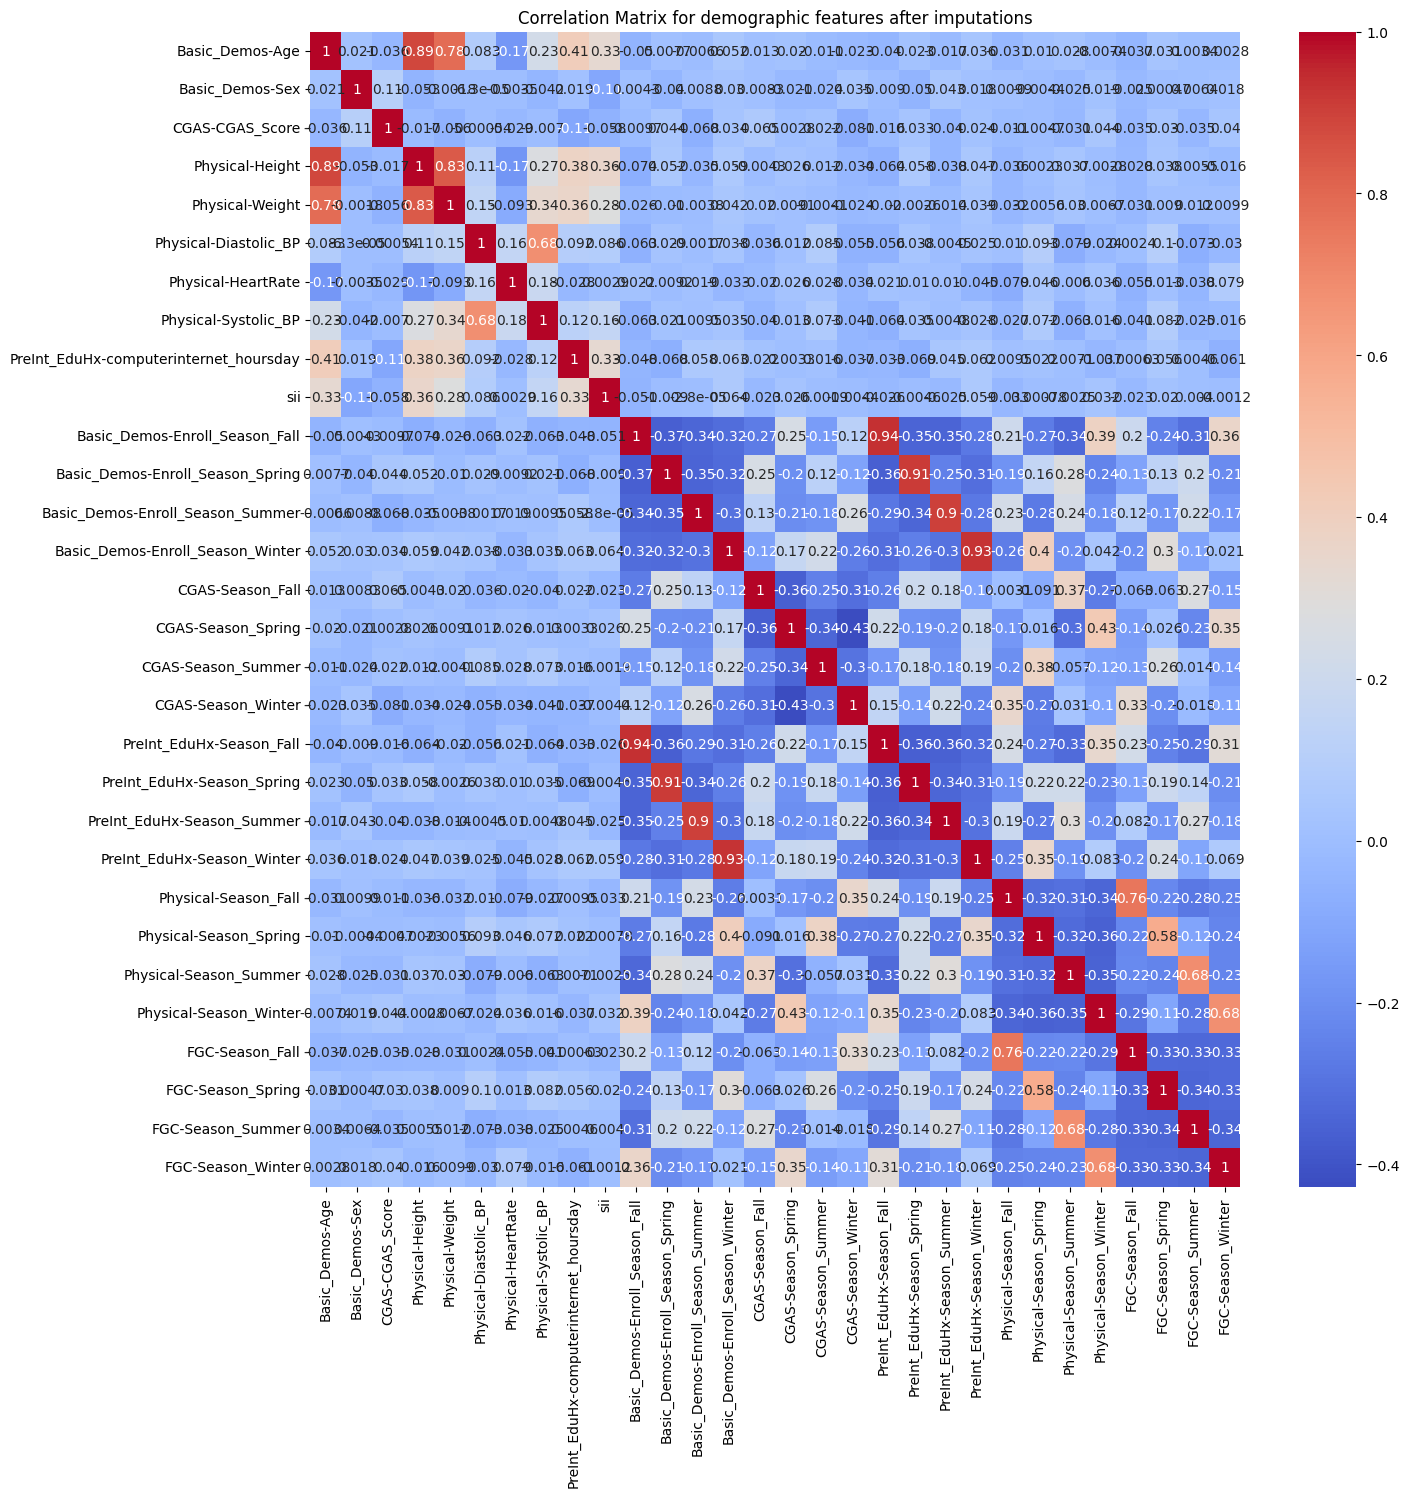

In [ ]:
cor3=train_df2.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor3,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for demographic features after imputations')
plt.show()

- Based on above correlation graph Physical season and FGC season are also correlated. We will drop Physical season as it seems to be slightly less correlated to Sii.
- Basic_Demos-Enroll_Season and preInt_EDuHx-Season are highly corellated. Basic_Demos-Enroll_Season will be dropped.

###     Table 3: Age vs Problematic Internet Usage

In [ ]:
age_bins = range(train_df2['Basic_Demos-Age'].min(), train_df2['Basic_Demos-Age'].max(), 5)

age_group_sii_sum = train_df2.groupby(
    pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False)
)['sii'].sum()

#creating a dataframe to check number of children with problematic usage based on age bins
age_group_count = train_df2.groupby(
    pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False)
)['sii'].count()

#creating a dataframe to check number of chicldren in total based on age bins
age_group_summary = pd.DataFrame({
    'sii_sum': age_group_sii_sum,
    'sii_count': age_group_count
})
age_group_summary['sii_ratio'] = age_group_summary['sii_sum'] / age_group_summary['sii_count']
# Display the DataFrame
age_group_summary.head()


<ipython-input-77-23bb7ce95ee9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sii_sum = train_df2.groupby(
<ipython-input-77-23bb7ce95ee9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_count = train_df2.groupby(


sii_sum  sii_count  sii_ratio
Basic_Demos-Age                               
[5, 10)            123.0        487   0.252567
[10, 15)           204.0        370   0.551351
[15, 20)            81.0        129   0.627907

### Table 4: Realtion between target and Height and weight

In [ ]:
train_df2.groupby('sii')[['Physical-Height','Physical-Weight']].mean()

Physical-Height  Physical-Weight
sii                                  
0.0        53.889827        80.535322
1.0        59.271751       105.498725

- May be children with problematic internet usage are comparitively heavire than those with no problematic usage.
- However, this was not evident from Correlation matrix in Figure 3

### Table 5: Relation between target and heart rate

In [ ]:
train_df2.groupby('sii')[['Physical-HeartRate','Physical-Systolic_BP','Physical-Diastolic_BP']].mean()

Physical-HeartRate  Physical-Systolic_BP  Physical-Diastolic_BP
sii                                                                 
0.0           82.048027            115.391081              68.843911
1.0           82.128329            121.012107              71.404358

- There is no significant difference mean of Heartrate for children with and without problematic internet usage.
- Same is the case with Diastolic-BP, there is no significant difference.
- However, there seems to be a significant difference between mean of Systolic-BP for the target groups.

### Figure:4 Relation between Hours usage of Computer and sii

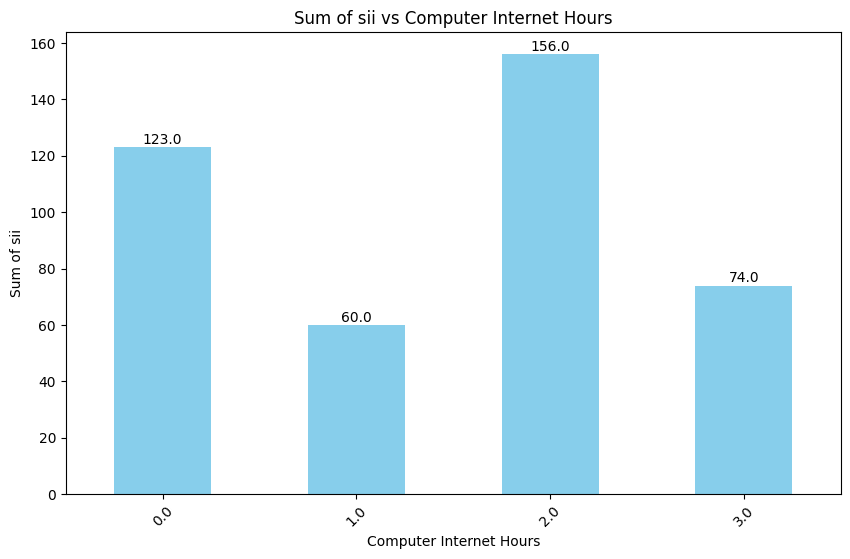

In [ ]:
# Grouping data by 'PreInt_EduHx-computerinternet_hoursday' and summing the 'sii' values
computer_hours_grouped = train_df2.groupby('PreInt_EduHx-computerinternet_hoursday')['sii'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = computer_hours_grouped.plot(kind='bar', color='skyblue')

# Adding values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, round(i.get_height(), 2),
            ha='center', va='bottom', fontsize=10)

plt.title('Sum of sii vs Computer Internet Hours')
plt.xlabel('Computer Internet Hours')
plt.ylabel('Sum of sii')
plt.xticks(rotation=45)
plt.show()


### Figure 5 :Relation between Hours of Computer usage and Age groups

<ipython-input-81-30c957c6348e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = train_df2.groupby([pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False),


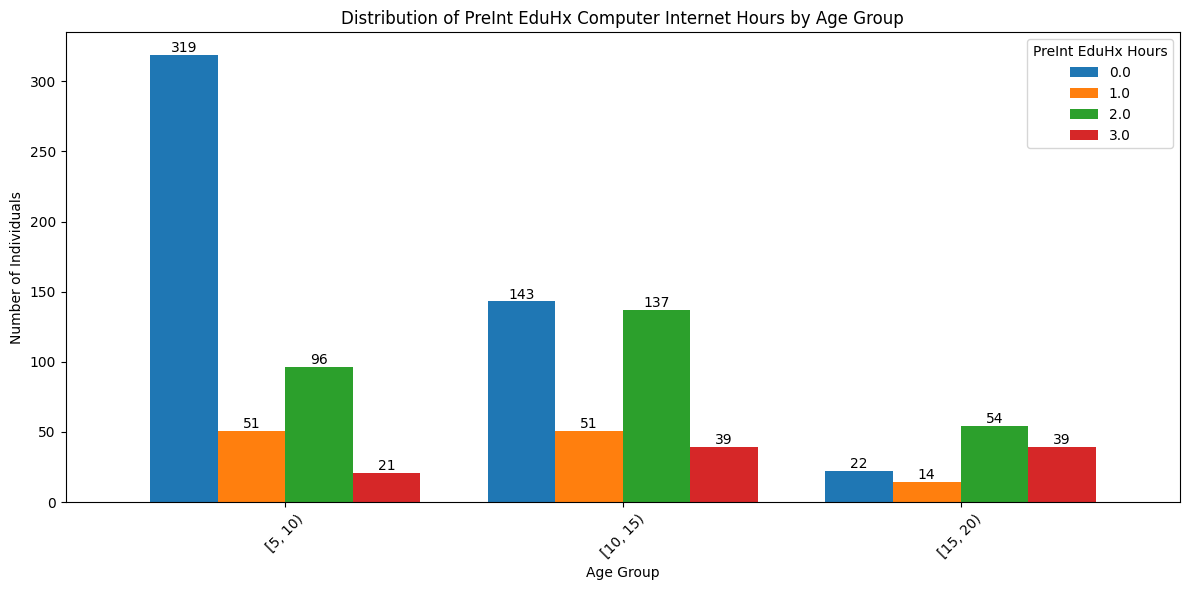

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the age bins
age_bins = range(train_df2['Basic_Demos-Age'].min(), train_df2['Basic_Demos-Age'].max(), 5)

# Group by age bin and 'PreInt_EduHx-computerinternet_hoursday' without creating a new column
age_group_counts = train_df2.groupby([pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False),
                                     'PreInt_EduHx-computerinternet_hoursday']).size().unstack(fill_value=0)

# Plot the counts as a grouped bar plot (side by side bars)
age_group_counts.plot(kind='bar', figsize=(12, 6), width=0.8)

# Add labels and title
plt.title('Distribution of PreInt EduHx Computer Internet Hours by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='PreInt EduHx Hours')

# Add counts on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


- From Table 3, we see that the ratio of children with problematic internet usage increases age.
- Team thinks that this is consistent with children in general, as they group up they get exposed to more gadgets which gives them access to internet.

- From Figure 4, it is surprinsing to see that there are significant number of people problematic internet usage even when they are using internet/computer for less than 1 hour per day.

- However, most number of problematic internet users are using internet/computer for around 2 hr per day.

- From Figure 5, we see that most number of internet users are in the age group of 5-10.

In [ ]:
train_df2=train_df2.drop(columns=['Physical-Season_Fall','Physical-Season_Spring','Physical-Season_Summer','Physical-Season_Winter'])
train_df2=train_df2.drop(columns=['Basic_Demos-Enroll_Season_Fall','Basic_Demos-Enroll_Season_Spring','Basic_Demos-Enroll_Season_Summer','Basic_Demos-Enroll_Season_Winter'])

In [ ]:
demo_train_df=train_df2[train_df2['id'].isin(tr_ids)]
demo_test_df=train_df2[train_df2['id'].isin(te_ids)]

In [ ]:
print(demo_train_df.shape,demo_test_df.shape)

(796, 23) (200, 23)


In [ ]:
print('Null rows in Training data: ',demo_train_df.isna().sum().sum())
print('Null rows in Testing data: ',demo_test_df.isna().sum().sum())

Null rows in Training data:  0
Null rows in Testing data:  0


##  Final dataframe

In [ ]:
train_df=pd.merge(final_feature_train_data,demo_train_df,on='id',how='left')
train_df=pd.merge(train_df,X_train_SomeFC,on='id',how='left')
test_df=pd.merge(final_feature_test_data,demo_test_df,on='id',how='left')
test_df=pd.merge(test_df,X_test_SomeFC,on='id',how='left')


In [ ]:
train_df=train_df.drop(columns=['sii_y']).rename(columns={'sii_x':'sii'})
test_df=test_df.drop(columns=['sii_y']).rename(columns={'sii_x':'sii'})

In [ ]:
print('Null rows in Training data: ',train_df.isna().sum().sum())
print('Null rows in Testing data: ',test_df.isna().sum().sum())
print('Shape of Training data: ',train_df.shape)
print('Shape of Testing data: ',test_df.shape)

Null rows in Training data:  0
Null rows in Testing data:  0
Shape of Training data:  (796, 79)
Shape of Testing data:  (200, 79)


In [ ]:

# Numerical columns
numerical_cols_train = train_df.select_dtypes(include=['number']).columns
numerical_cols_test = test_df.select_dtypes(include=['number']).columns

print("Numerical columns in train_df:")
print(numerical_cols_train)
print("\nNumerical columns in test_df:")
print(numerical_cols_test)

# Object columns
object_cols_train = train_df.select_dtypes(include=['object']).columns
object_cols_test = test_df.select_dtypes(include=['object']).columns

print("\nObject columns in train_df:")
print(object_cols_train)
print("\nObject columns in test_df:")
object_cols_test

Numerical columns in train_df:
Index(['enmo__root_mean_square', 'Y__mean', 'non-wear_flag__median',
       'battery_voltage__median', 'Y__root_mean_square', 'non-wear_flag__mean',
       'X__standard_deviation', 'Z__minimum', 'anglez__median',
       'light__standard_deviation_x', 'non-wear_flag__absolute_maximum',
       'enmo__mean', 'X__root_mean_square', 'Y__standard_deviation',
       'light__mean', 'battery_voltage__absolute_maximum',
       'Z__standard_deviation', 'Z__maximum',
       'non-wear_flag__standard_deviation', 'Basic_Demos-Age',
       'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'PreInt_EduHx-computerinternet_hoursday',
       'CGAS-Season_Fall', 'CGAS-Season_Spring', 'CGAS-Season_Summer',
       'CGAS-Season_Winter', 'PreInt_EduHx-Season_Fall',
       'PreInt_EduHx-Season_Spring', 'PreInt_EduHx-Season_Summer',
       'PreInt_EduHx-Season_Winter', 'FGC

Index(['sii', 'id'], dtype='object')

# Step 4. Penultimate Model for Prediction

- In this section, we are checking the models again.
- It is worthy to mention that, team had to introduce additional hyperparameters to reduce the gap between the Training and test metrics.
- These hyperparameters slighty reduced the performance on the test set aswell.

In [ ]:
X_train=train_df.drop(columns=['id','sii'])
y_train=train_df['sii']
X_test=test_df.drop(columns=['id','sii'])
y_test=test_df['sii']

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(796, 77) (796,) (200, 77) (200,)


In [ ]:
#Using SMOTE to oversample the minority class.
sm=SMOTE(random_state=99,k_neighbors=5)

X_train_r,y_train_r=sm.fit_resample(X_train,y_train)

print(X_train_r.shape,y_train_r.shape)


(926, 77) (926,)


In [ ]:
#Random forest model

rfr_2 = RandomForestClassifier(
    n_estimators=40,
    random_state=99,
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=5,
    max_features='sqrt'
)

rfr_2.fit(X_train_r,y_train_r)

train_pred_rfr2=rfr_2.predict(X_train_r)
train_prob_rfr2=rfr_2.predict_proba(X_train_r)[:,1]
test_pred_rfr2=rfr_2.predict(X_test)
test_prob_rfr2=rfr_2.predict_proba(X_test)[:,1]

#Metrics
print('Training metrics:')
print(confusion_matrix(y_train_r,train_pred_rfr2))
print(classification_report(y_train_r,train_pred_rfr2))
print('AUC score:',roc_auc_score(y_train_r,train_prob_rfr2))
print('Testing metrics:')
print(confusion_matrix(y_test,test_pred_rfr2))
print(classification_report(y_test,test_pred_rfr2))
print('AUC score:',roc_auc_score(y_test,test_prob_rfr2))


Training metrics:
[[336 127]
 [ 64 399]]
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       463
         1.0       0.76      0.86      0.81       463

    accuracy                           0.79       926
   macro avg       0.80      0.79      0.79       926
weighted avg       0.80      0.79      0.79       926

AUC score: 0.8739556559017395
Testing metrics:
[[81 39]
 [21 59]]
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       120
         1.0       0.60      0.74      0.66        80

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200

AUC score: 0.759375


In [ ]:
#Random forest model

gbc_2 = GradientBoostingClassifier(
    random_state=99,
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=5,
    subsample=0.7
)

gbc_2.fit(X_train_r,y_train_r)

train_pred_rfr2=gbc_2.predict(X_train_r)
train_prob_rfr2=gbc_2.predict_proba(X_train_r)[:,1]
test_pred_rfr2=gbc_2.predict(X_test)
test_prob_rfr2=gbc_2.predict_proba(X_test)[:,1]

#Metrics
print('Training metrics:')
print(confusion_matrix(y_train_r,train_pred_rfr2))
print(classification_report(y_train_r,train_pred_rfr2))
print('AUC score:',roc_auc_score(y_train_r,train_prob_rfr2))
print('Testing metrics:')
print(confusion_matrix(y_test,test_pred_rfr2))
print(classification_report(y_test,test_pred_rfr2))
print('AUC score:',roc_auc_score(y_test,test_prob_rfr2))


Training metrics:
[[362 101]
 [ 71 392]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       463
         1.0       0.80      0.85      0.82       463

    accuracy                           0.81       926
   macro avg       0.82      0.81      0.81       926
weighted avg       0.82      0.81      0.81       926

AUC score: 0.9031529745438941
Testing metrics:
[[87 33]
 [24 56]]
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75       120
         1.0       0.63      0.70      0.66        80

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.72      0.71      0.72       200

AUC score: 0.7764583333333334


- Results from 2 models

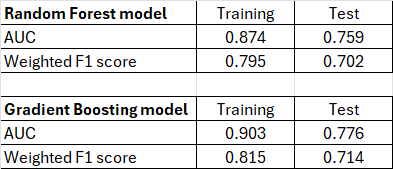

In [ ]:
# prompt: get the feature importance using permutation importance for gbc_2model and print features in descending order of their importance

import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming gbc_2 and X_test, y_test are defined from the previous code
r = permutation_importance(gbc_2, X_test, y_test, n_repeats=30, random_state=0)

feature_importance = pd.DataFrame(
    {'feature': X_test.columns, 'importance': r.importances_mean}
).sort_values('importance', ascending=False)

feature_importance


feature  importance
27          PreInt_EduHx-computerinternet_hoursday    0.055833
22                                 Physical-Height    0.036833
59                                enmo__sum_values    0.017833
56                   enmo__cid_ce__normalize_False    0.012167
26                            Physical-Systolic_BP    0.009333
..                                             ...         ...
13                           Y__standard_deviation   -0.003500
51               Y__partial_autocorrelation__lag_1   -0.004000
50                       Y__number_crossing_m__m_0   -0.004833
70  light__permutation_entropy__dimension_3__tau_1   -0.005000
53                 anglez__number_crossing_m__m_-1   -0.005333

[77 rows x 2 columns]

- We see that there are many features with have a negative importance.
- Potentially there were columns which had 0 importance too.
- Those columns will be dropped in the final model.

In [ ]:
# Assuming feature_importance is a DataFrame with a column 'importance'
potential_noise = feature_importance[feature_importance['importance'] <= 0.00]

# List of features with negative importance
print('Indices pf porential noise:')
negative_features = potential_noise.index.tolist()

print(negative_features)
print('\nNumber of columns that are potential noise: ',len(negative_features))

Indices pf porential noise:
[74, 65, 75, 48, 72, 54, 67, 68, 58, 73, 62, 55, 38, 43, 32, 2, 3, 5, 6, 8, 10, 18, 42, 30, 31, 28, 33, 37, 35, 36, 39, 34, 52, 47, 66, 69, 20, 16, 76, 24, 13, 51, 50, 70, 53]

Number of columns that are potential noise:  45


In [ ]:
noise_columns=[]
for i in negative_features:
  a=feature_importance.iloc[i,0]
  noise_columns.append(a)
print('Names of potentially noise columns:')
print(noise_columns)


Names of potentially noise columns:
['Y__number_crossing_m__m_0', 'Y__benford_correlation', 'light__permutation_entropy__dimension_3__tau_1', 'battery_voltage__median', 'Y__standard_deviation', 'Y__autocorrelation__lag_3', 'light__number_peaks__n_5', 'Basic_Demos-Sex', 'PreInt_EduHx-Season_Spring', 'Y__partial_autocorrelation__lag_1', 'FGC-Season_Winter', 'CGAS-Season_Summer', 'light__number_peaks__n_1', 'anglez__number_crossing_m__m_1', 'light__permutation_entropy__dimension_7__tau_1', 'enmo__sum_values', 'enmo__cid_ce__normalize_False', 'Z__maximum', 'Z__minimum', 'Physical-Weight', 'X__spkt_welch_density__coeff_2', 'light__standard_deviation_x', 'light__has_duplicate_min', 'Y__agg_autocorrelation__f_agg_"median"__maxlag_40', 'light__mean_abs_change', 'Y__autocorrelation__lag_5', 'light__number_crossing_m__m_0', 'anglez__number_crossing_m__m_0', 'Y__cid_ce__normalize_True', 'light__permutation_entropy__dimension_5__tau_1', 'light__number_peaks__n_3', 'light__root_mean_square', 'non-w

In [ ]:
y_test.value_counts()

sii
0.0    120
1.0     80
Name: count, dtype: int64

# Step 5: Final model for prediction

In [ ]:
from sklearn.metrics import f1_score
X_train_reduced=X_train_r.drop(columns=noise_columns)
X_test_reduced=X_test.drop(columns=noise_columns)
gbc_3=GradientBoostingClassifier(
    random_state=99,
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=5,
    subsample=0.7
)

gbc_3.fit(X_train_reduced,y_train_r)
train_pred_gbc3=gbc_3.predict(X_train_reduced)
train_prob_gbc3=gbc_3.predict_proba(X_train_reduced)[:,1]
test_pred_gbc3=gbc_3.predict(X_test_reduced)
test_prob_gbc3=gbc_3.predict_proba(X_test_reduced)[:,1]

print(X_train_reduced.shape,X_test_reduced.shape)
print('Training metrics:')
print(confusion_matrix(y_train_r,train_pred_gbc3))
print(classification_report(y_train_r,train_pred_gbc3))
print('AUC score:',roc_auc_score(y_train_r,train_prob_gbc3))
print('Testing metrics:')
print(confusion_matrix(y_test,test_pred_gbc3))
print(classification_report(y_test,test_pred_gbc3))
print('AUC score:',roc_auc_score(y_test,test_prob_gbc3))
print('F1 score:',f1_score(y_test,test_pred_gbc3,average='weighted'))


(926, 32) (200, 32)
Training metrics:
[[355 108]
 [ 87 376]]
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78       463
         1.0       0.78      0.81      0.79       463

    accuracy                           0.79       926
   macro avg       0.79      0.79      0.79       926
weighted avg       0.79      0.79      0.79       926

AUC score: 0.8765959630357002
Testing metrics:
[[89 31]
 [23 57]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77       120
         1.0       0.65      0.71      0.68        80

    accuracy                           0.73       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.74      0.73      0.73       200

AUC score: 0.7620833333333333
F1 score: 0.7317733990147783


-  We see the Grdient boosting (gbc_3) model works better. Hence, That will be considerd the final model.
- We see that dropping those potentiall noise columns,
  - Incresed weighted F1 score on the tes set.
  - Reduced overfitting on the Traingin set.

# Step 6: Interpretability and discussion

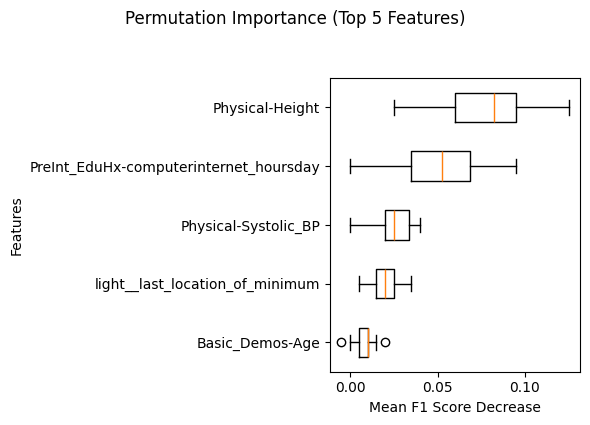

In [ ]:
from sklearn.inspection import permutation_importance

clf=gbc_3
result=permutation_importance(clf,X_test_reduced,y_test,n_repeats=30,random_state=99)
perm_sorted_idx = result.importances_mean.argsort()

# Get the top 5 most important feature indices
top5_indices = perm_sorted_idx[-5:]  # Indices of top 5 features

# Get the feature names for the top 5 features
top5_features = X_test_reduced.columns[top5_indices]

# Plot permutation importances for the top 5 features
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[top5_indices].T, vert=False, labels=top5_features)
fig.suptitle("Permutation Importance (Top 5 Features)", y=1.05)
ax1.set_xlabel("Mean F1 Score Decrease")
ax1.set_ylabel("Features")
fig.tight_layout()
plt.show()

In [ ]:
print('Full list of features in ascending order of importance: ',X_test_reduced.columns[perm_sorted_idx])

Full list of features in ascending order of importance:  Index(['light__ar_coefficient__coeff_0__k_10', 'Y__mean',
       'PreInt_EduHx-Season_Fall', 'FGC-Season_Summer', 'FGC-Season_Spring',
       'PreInt_EduHx-Season_Winter', 'CGAS-Season_Winter', 'CGAS-Season_Fall',
       'X__root_mean_square', 'enmo__number_crossing_m__m_1',
       'FGC-Season_Fall', 'light__first_location_of_minimum',
       'light__permutation_entropy__dimension_6__tau_1',
       'PreInt_EduHx-Season_Summer', 'battery_voltage__absolute_maximum',
       'enmo__root_mean_square', 'Physical-Diastolic_BP',
       'Z__number_crossing_m__m_0', 'Y__autocorrelation__lag_6',
       'Y__autocorrelation__lag_4', 'Y__minimum', 'enmo__maximum',
       'non-wear_flag__mean', 'light__mean', 'enmo__mean',
       'Physical-HeartRate', 'light__permutation_entropy__dimension_4__tau_1',
       'Basic_Demos-Age', 'light__last_location_of_minimum',
       'Physical-Systolic_BP', 'PreInt_EduHx-computerinternet_hoursday',
       'Phys

In [ ]:
!pip install pulp
!pip install pycebox



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3626 sha256=bf1ea11de3d19e627c049914370ac26be3cb904c89e0b5c3adb4e8e356077fb5
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


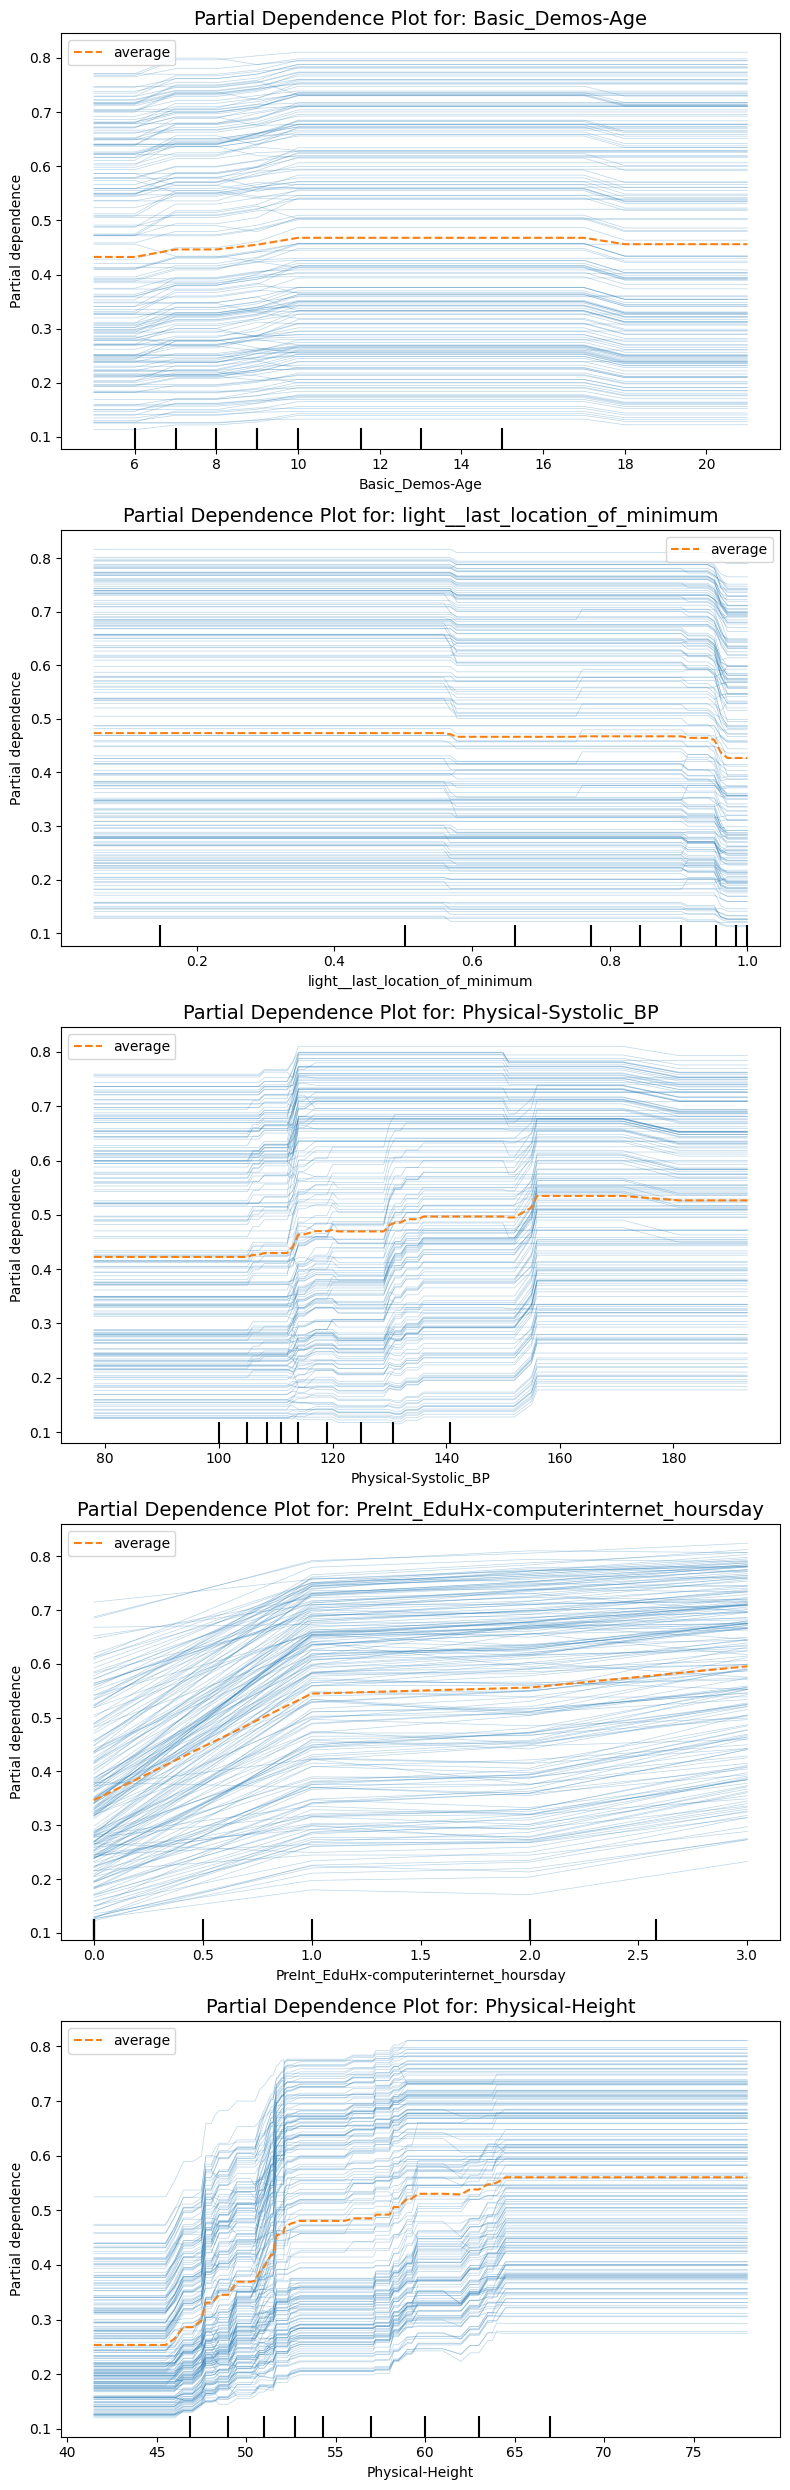

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

features = list(top5_features)

# Create a figure and axes with the desired number of rows (one for each feature)
fig, axes = plt.subplots(len(features), 1, figsize=(8, 5 * len(features)))

# Plot PDP for each feature
for i, feature in enumerate(features):
    # Plot partial dependence for the feature
    PartialDependenceDisplay.from_estimator(
        gbc_3, X_test_reduced, features=[feature], kind="both", subsample=600, n_jobs=20, ax=axes[i]
    )

    # Set the title for the plot
    axes[i].set_title(f"Partial Dependence Plot for: {feature}", fontsize=14)

    # Set the X and Y axis labels
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Predicted Probability', fontsize=12)

# Adjust the layout to make sure the plots don't overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
dd[dd['Field']=='PreInt_EduHx-computerinternet_hoursday']

Instrument                                   Field  \
80  Internet Use  PreInt_EduHx-computerinternet_hoursday   

                         Description             Type   Values  \
80  Hours of using computer/internet  categorical int  0,1,2,3   

                                         Value Labels  
80  0=Less than 1h/day, 1=Around 1h/day, 2=Around ...

In [ ]:
dd[dd['Field']=='PreInt_EduHx-computerinternet_hoursday'].iloc[0,5]

'0=Less than 1h/day, 1=Around 1h/day, 2=Around 2hs/day, 3=More than 3hs/day'

Problematic Internet Usage = PIU
INterpretation of of Partial dependency plots
1.  As the Physical height increases, the probability of PIU increases.
  - This is in line with out Table 3: Where in the % of children with PIU increases with age, generally Height and Age are positively corelated.
    - There is not change in probability of PIU until the Physical Height is arounf 45 units (most probably inches).

2.  As the value for PreInt_EduHx-computerinternet_hoursday increases the probability of problematic internet increases.
    - There is a relatively steeper line until PreInt_EduHx-computerinternet_hours is 0 to 1.
    - After 1, the rise is more gentle.

3.  As the value of Physical-Systolic_BP increases the probability of PIU increases.

4.  The partial dependence plot Light_last location of minimum is relatively flat. Hoever, the probabiliy of internet usage decreases if the value of feature is 0.9 and above.

5.  The partial dependence plot for Besic_demos_age is relatively flt. However, the line rises from age 6-10, platueaus out at 10-17 and then slight drops after 17. So, probability of PIU increase accordingly.
    - Again this is inline with findings of Table 3.

# Step 7: Further interpretations

- We see that the top 5 features are related to age, physical conditions, hours of usage, and light.
- In this section we will dig deeper into related features.

##  7.1. Light

- light__last_location_of_minimum by itself is not a very useful feature to gain insights. Because it identifies the relative position of last minimum value.
- However, it point us in the direction of feature of "light". Here we have chose a more interpretable feature called light__mean which happend to be 9th important feature.

In [ ]:
SomeFC_train_data.groupby('sii')[['light__last_location_of_minimum']].mean()


light__last_location_of_minimum
sii                                 
0.0                         0.752938
1.0                         0.681497

In [ ]:
final_feature_train_data.groupby('sii')['light__mean'].mean()

sii
0.0    44.588959
1.0    35.912543
Name: light__mean, dtype: float64

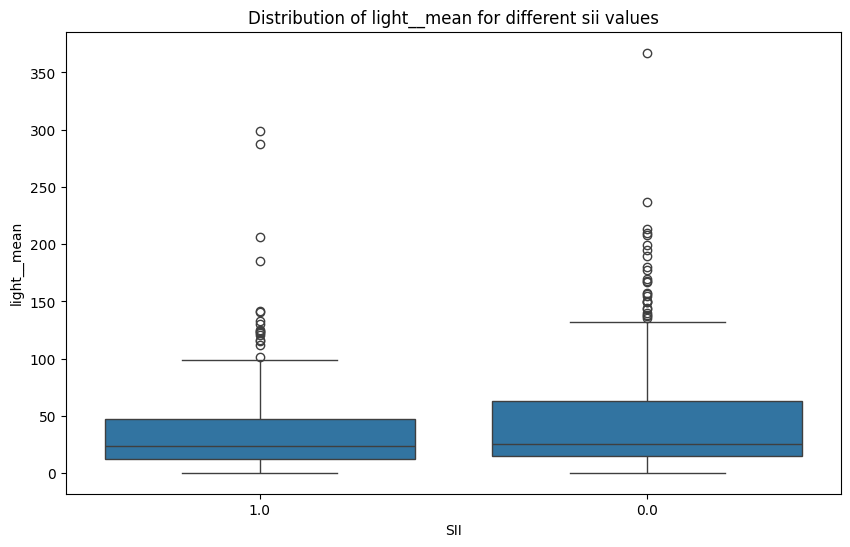

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_feature_train_data is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='sii', y='light__mean', data=final_feature_train_data)
plt.title('Distribution of light__mean for different sii values')
plt.xlabel('SII')
plt.ylabel('light__mean')
plt.show()

- We see that based on the above tables, a child in a well lit environment is less prone to Problematic internet usage.
- A higher value of light__mean can possibly mean that,
  - Engaging in activities with family, where environments are well-lit.
  - A child might be spending more time outdoors.

##  7.2. Physical Conditions

### 7.2.1. Physical conditions based on Height and Weight

In [ ]:
demo_df.groupby('sii')[['Physical-BMI']].mean()

Physical-BMI
sii              
0.0     18.555417
1.0     20.315168

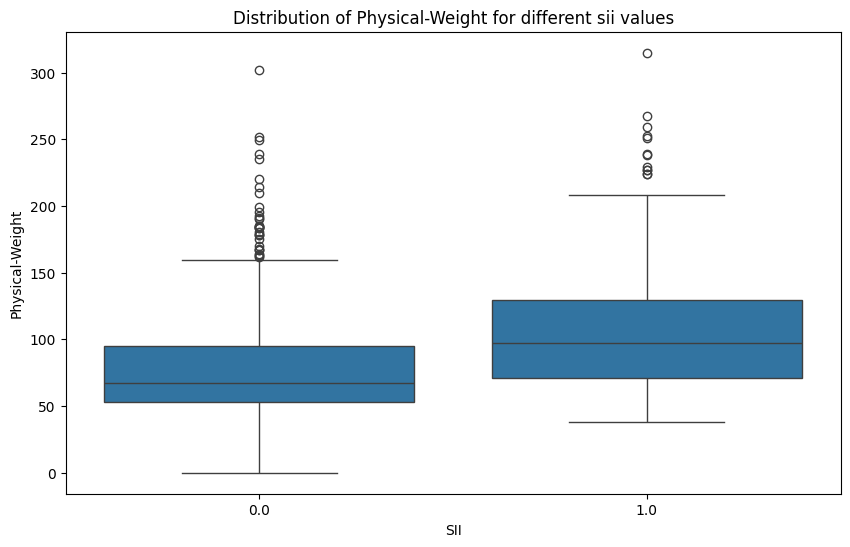

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sii', y='Physical-Weight', data=demo_df)
plt.title('Distribution of Physical-Weight for different sii values')
plt.xlabel('SII')
plt.ylabel('Physical-Weight')
plt.show()

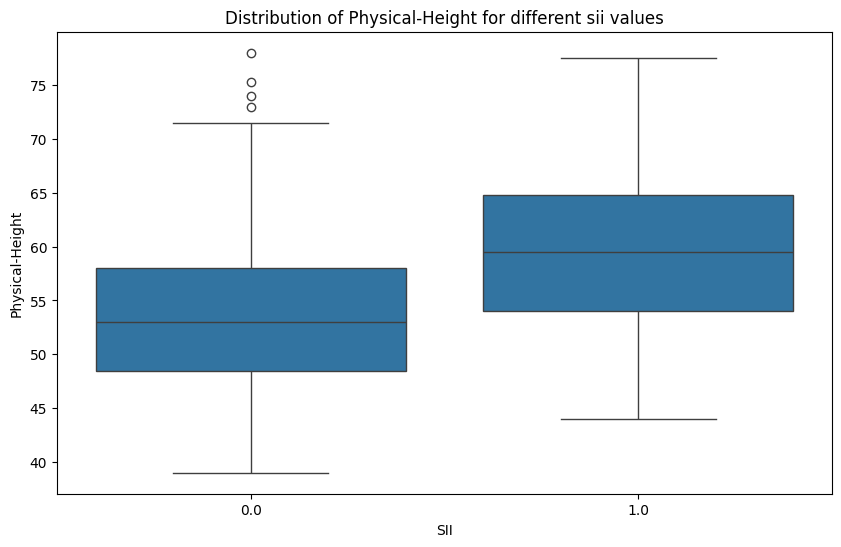

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sii', y='Physical-Height', data=demo_df)
plt.title('Distribution of Physical-Height for different sii values')
plt.xlabel('SII')
plt.ylabel('Physical-Height')
plt.show()

- Althoug based on the above boxplots children with more Weight and Height tend to be in class 1.
- Partial dependence values say, as height increases probability of PUI increase,
- However, this correlation may be due to natural growth and aging rather than a direct causal link. As children age, it is natural for their height and weight to increase, which aligns with more exposure to internet usage.

### 7.2.2. Physical conditions based on Blood pressure

In [ ]:
demo_df.groupby('sii')[['Physical-Systolic_BP']].mean()

Physical-Systolic_BP
sii                      
0.0            115.504378
1.0            121.147059

In [ ]:
age_bins = range(train_df2['Basic_Demos-Age'].min(), train_df2['Basic_Demos-Age'].max(), 5)
train_df2['age_group'] = pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False)

pivot_table = train_df2.pivot_table(
    index='sii',
    columns='age_group',
    values=['Physical-Systolic_BP'],
    aggfunc='mean'
)

pivot_table


<ipython-input-113-6ecca411b054>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = train_df2.pivot_table(


Physical-Systolic_BP                        
age_group              [5, 10)    [10, 15)    [15, 20)
sii                                                   
0.0                 112.873626  117.403614  125.875000
1.0                 117.910569  121.318627  123.975309

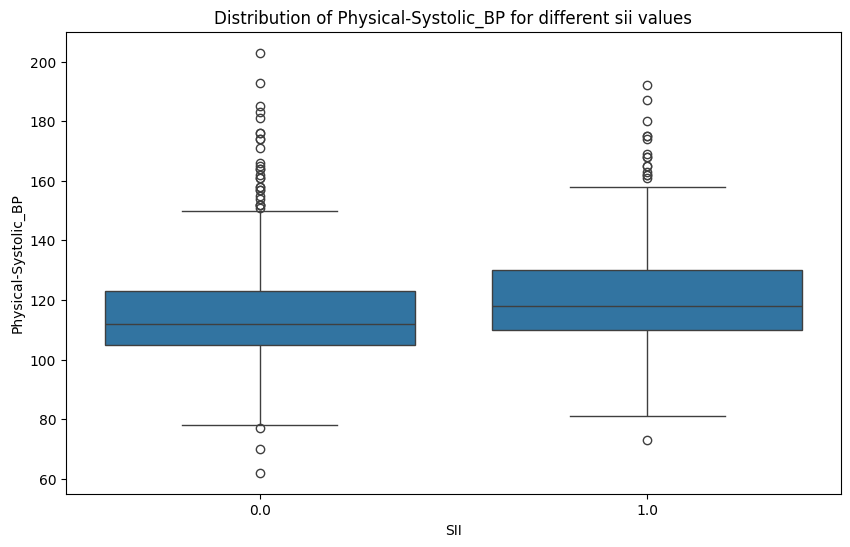

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sii', y='Physical-Systolic_BP', data=demo_df)
plt.title('Distribution of Physical-Systolic_BP for different sii values')
plt.xlabel('SII')
plt.ylabel('Physical-Systolic_BP')
plt.show()

- Higher systolic blood pressure is observed among children with PIU. This may align with existing studies on the link between a sedentary lifestyle and hypertension, as identified by Samuel Fink, MD ("The Link Between a Sedentary Lifestyle and Hypertension").

- "The Link Between a Sedentary Lifestyle and Hypertension," by Dr. Samuel Fink. Accessed at https://www.samuelfinkmd.com/blog/the-link-between-a-sedentary-lifestyle-and-hypertension.

- Extending this, a sedentary lifestyle may also increase the likelihood of problematic internet usage.

## 7.3. Age

Reproduced table 3

In [ ]:
age_bins = range(train_df2['Basic_Demos-Age'].min(), train_df2['Basic_Demos-Age'].max(), 5)

age_group_sii_sum = train_df2.groupby(
    pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False)
)['sii'].sum()

#creating a dataframe to check number of children with problematic usage based on age bins
age_group_count = train_df2.groupby(
    pd.cut(train_df2['Basic_Demos-Age'], bins=age_bins, right=False)
)['sii'].count()

#creating a dataframe to check number of chicldren in total based on age bins
age_group_summary = pd.DataFrame({
    'sii_sum': age_group_sii_sum,
    'sii_count': age_group_count
})
age_group_summary['sii_ratio'] = age_group_summary['sii_sum'] / age_group_summary['sii_count']
# Display the DataFrame
age_group_summary.head()


<ipython-input-115-23bb7ce95ee9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sii_sum = train_df2.groupby(
<ipython-input-115-23bb7ce95ee9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_count = train_df2.groupby(


sii_sum  sii_count  sii_ratio
Basic_Demos-Age                               
[5, 10)            123.0        487   0.252567
[10, 15)           204.0        370   0.551351
[15, 20)            81.0        129   0.627907

- As age increases probability of PIU may increase.
- A natural inclination toward online activities as a source of entertainment or socialization can also be a reason

# 7.4. Hours of internet usage

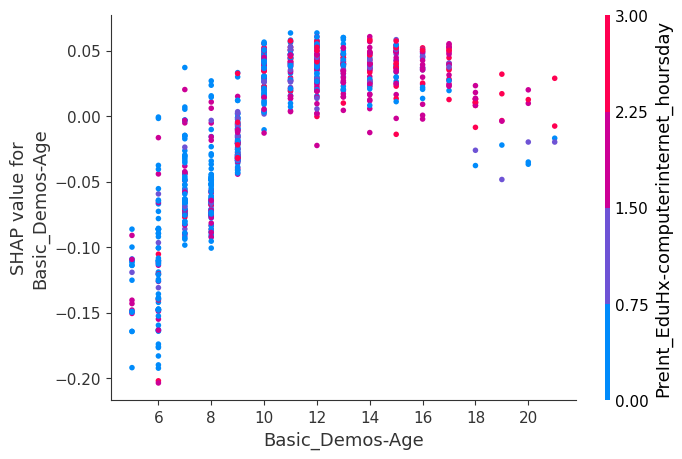

In [ ]:
import shap
# Create SHAP explainer
explainer = shap.Explainer(gbc_3, X_train_reduced)

# Calculate SHAP values
shap_values = explainer(X_train_reduced)

# Access the SHAP values as a NumPy array
shap_values_array = shap_values.values

# SHAP dependence plot, use shap_values_array instead of shap_values
shap.dependence_plot('Basic_Demos-Age',  shap_values_array,X_train_reduced,interaction_index='PreInt_EduHx-computerinternet_hoursday')

plt.show()

- From the above SHAP dependence plot we see that Number of Hour of computer/Internet usage increases the probability of PIU at any given age.
- Based on the above graph, we see that for the children in age grop of 14 and above, longer internet usage hours is increases the probability of PIU.
- However, in case of age group below 14, we see that irrespective of hours of internet usage the probability of PIU is low.

# Step 8: Recommendations

- Based on the finding from the model, it is recommended that,

- For children of age group (5-15):
 -  Parents/Gaurdians should teach the importance of a balance lifestyle. They should encourgae childre in activities like outdoor games.
 -  Famiy time, assumed to be a probable cause, can create a sense of belonging and motivate children to spend time with family than use internet.

- For children of agre group (15-15) teenage:
  - Parents/Gaurdians should have an open conversation about respobsible internet usage.
  - They can promote active lifestyle by setting fitness goals, For example, completing 100 pushups or running for 20 minutes daily, can earn teenagers extra internet time as a reward. This will limit the usage of internet to some extent.

# Step 9: Conclusions

- Exploratory Data Analysis (EDA) is a crucial part of the model-building process. Even before constructing a model, it is essential to thoroughly understand which features could potentially be important. For example, through EDA, we identified that age, in some form, would be a valuable feature for predicting the target.

- K-fold validation was not used because we believed the training data would be reduced to 500 rows to keep the test data approximately the same size as the validation data (the current test data).

- In the first step, we used the Mutual Information method to extract useful features for predicting the target. This approach is relatively straightforward and effectively captures nonlinear relationships without relying on a model.

- In the second step, we utilized correlation analysis to drop highly correlated features and combined this with a variance threshold to remove features with low variance. These methods were appropriate given our relatively limited understanding of what the features represented.

- In the third step, we applied conventional EDA techniques to further reduce the number of features. This approach is more suitable when we have a solid understanding of the features under consideration.

- We observed that tree-based models are robust to outliers. Since these models work based on information gain, the presence of outliers does not significantly impact their performance.

- Tree-based models are also unaffected by feature scaling, eliminating the need for separate techniques like SMOTE. Additionally, algorithms such as Random Forest and Gradient Boosting incorporate an in-built class weight parameter that can be adjusted to handle class imbalance effectively.

- Noisy features negatively impact performance metrics on the test dataset and lead to overfitting on the training data. Therefore, it is crucial to identify and eliminate noisy columns before constructing the final model.

- Model building is an iterative process. There is no single "best" model. Multiple techniques should be explored to achieve optimal results. For instance, while we focused on tree-based models due to their robustness, we could have also built an SVM model or applied PCA to the large EfficientFC dataset, accepting a trade-off in interpretability for improved predictive performance. Alternatively, more interpretable models could have been used to extract insights.